# Default of Credit Card Clients Predictions

Dataset from UC Irvine ML Repository<br>

This is a dataset for research that focuses on predicting customer default payments in Taiwan, comparing the accuracy of default probability predictions across six data mining methods. <br> 

Data Characteristics: Multivariate, Features: 23 (Integer, Real).


# Problem Identification

From the dataset, we will try to identify customer behaviour and patterns to predict the possibility of customer defaulting on next months payment. This will ultimately help to **optimize business revenue and help with better risk management**. 

# Machine Learning Techniques and Methodology

In [14]:
# Importing Libraries/Dependencies

# For Data Wrangling
import pandas as pd
import math
import numpy as np
import datetime

# For Data Visualization

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Machine Learning Models


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier




# Model evaluation - metrics

from sklearn.model_selection import cross_val_score


# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [3]:
# Exploratory Data Analysis

dataframe = pd.read_excel('/Users/ronishlamsal/Downloads/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
dataframe.info()
df= dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

Here,
* ID: unique identification number for every user.
* LIMIT_BAL: Amount of credit provided in New Taiwanese dollar
* SEX: 1 for male, 2 for female
* EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* MARRIAGE : 1 = married; 2 = single; 3 = others
* AGE
* PAY_1 to PAY_6: A record of past payments from April to September. PAY_1 means payment in september, PAY_6 means payment in April.
* BILL_AMT1 to BILL_AMT6: Bill statement amount. BILL_AMT1 means bill statement amount in september, BILL_PAY6 means bill statement amount in April
* PAY_AMT1 to PAY_AMT6: Amount of previous payment. 1 means amount paid in September to 6 means amount paid in April
* default payment next month: is the target variable we will be predicting. 

In [8]:
df['ID'].nunique()

29687

We can see the there are duplicated ID's( only 29687 unique IDs from 30000 total)

In [10]:
id_counts = df['ID'].value_counts()

In [11]:
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [12]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [15]:
dupe_mask = id_counts ==2
dupe_mask[0:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

Created boolean masks, for IDs that are duplicated. 

In [16]:
#Select and store the duplicated IDS in a new variable called dupe_ids

dupe_ids = id_counts.index[dupe_mask]

In [17]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [18]:
#Filtering through the larger dataframe in order to view all columns for the first three duplicate IDS

df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Duplicated rows are definitely faulty as age 0 and credit limit of 0 does not make sense
# Should be ok to delete these rows

df_zero_mask = df == 0

#Creating a Boolean series

feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [20]:
sum(feature_zero_mask)

315

In [21]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

#Saving it into new database look how .copy is used here 

In [22]:
#We would want to know if the number of remaining rows is equal to the number of unique
#Ids

df_clean_1.shape

(29685, 25)

In [23]:
df_clean_1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
#Exploring and cleaning the data

In [25]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [26]:
df_clean_1["PAY_1"].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [27]:
#obtaining value counts for PAY_1 

df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [28]:
#Removing rows of dataset that has a missing value

valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [29]:
sum(valid_pay_1_mask)

26664

In [30]:
#eliminate the rows with not available values

df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [31]:
df_clean_2.shape

(26664, 25)

In [32]:
#Converting PAy_1 columns from object datatype to int64. keeping it 
# consistent with other columns

df_clean_2['PAY_1'] = df_clean_2["PAY_1"].astype('int64')

In [33]:
df_clean_2[["PAY_1", 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [34]:
#Exploring the Credit Limit and Demographic Features

import matplotlib.pyplot as plt #importing plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

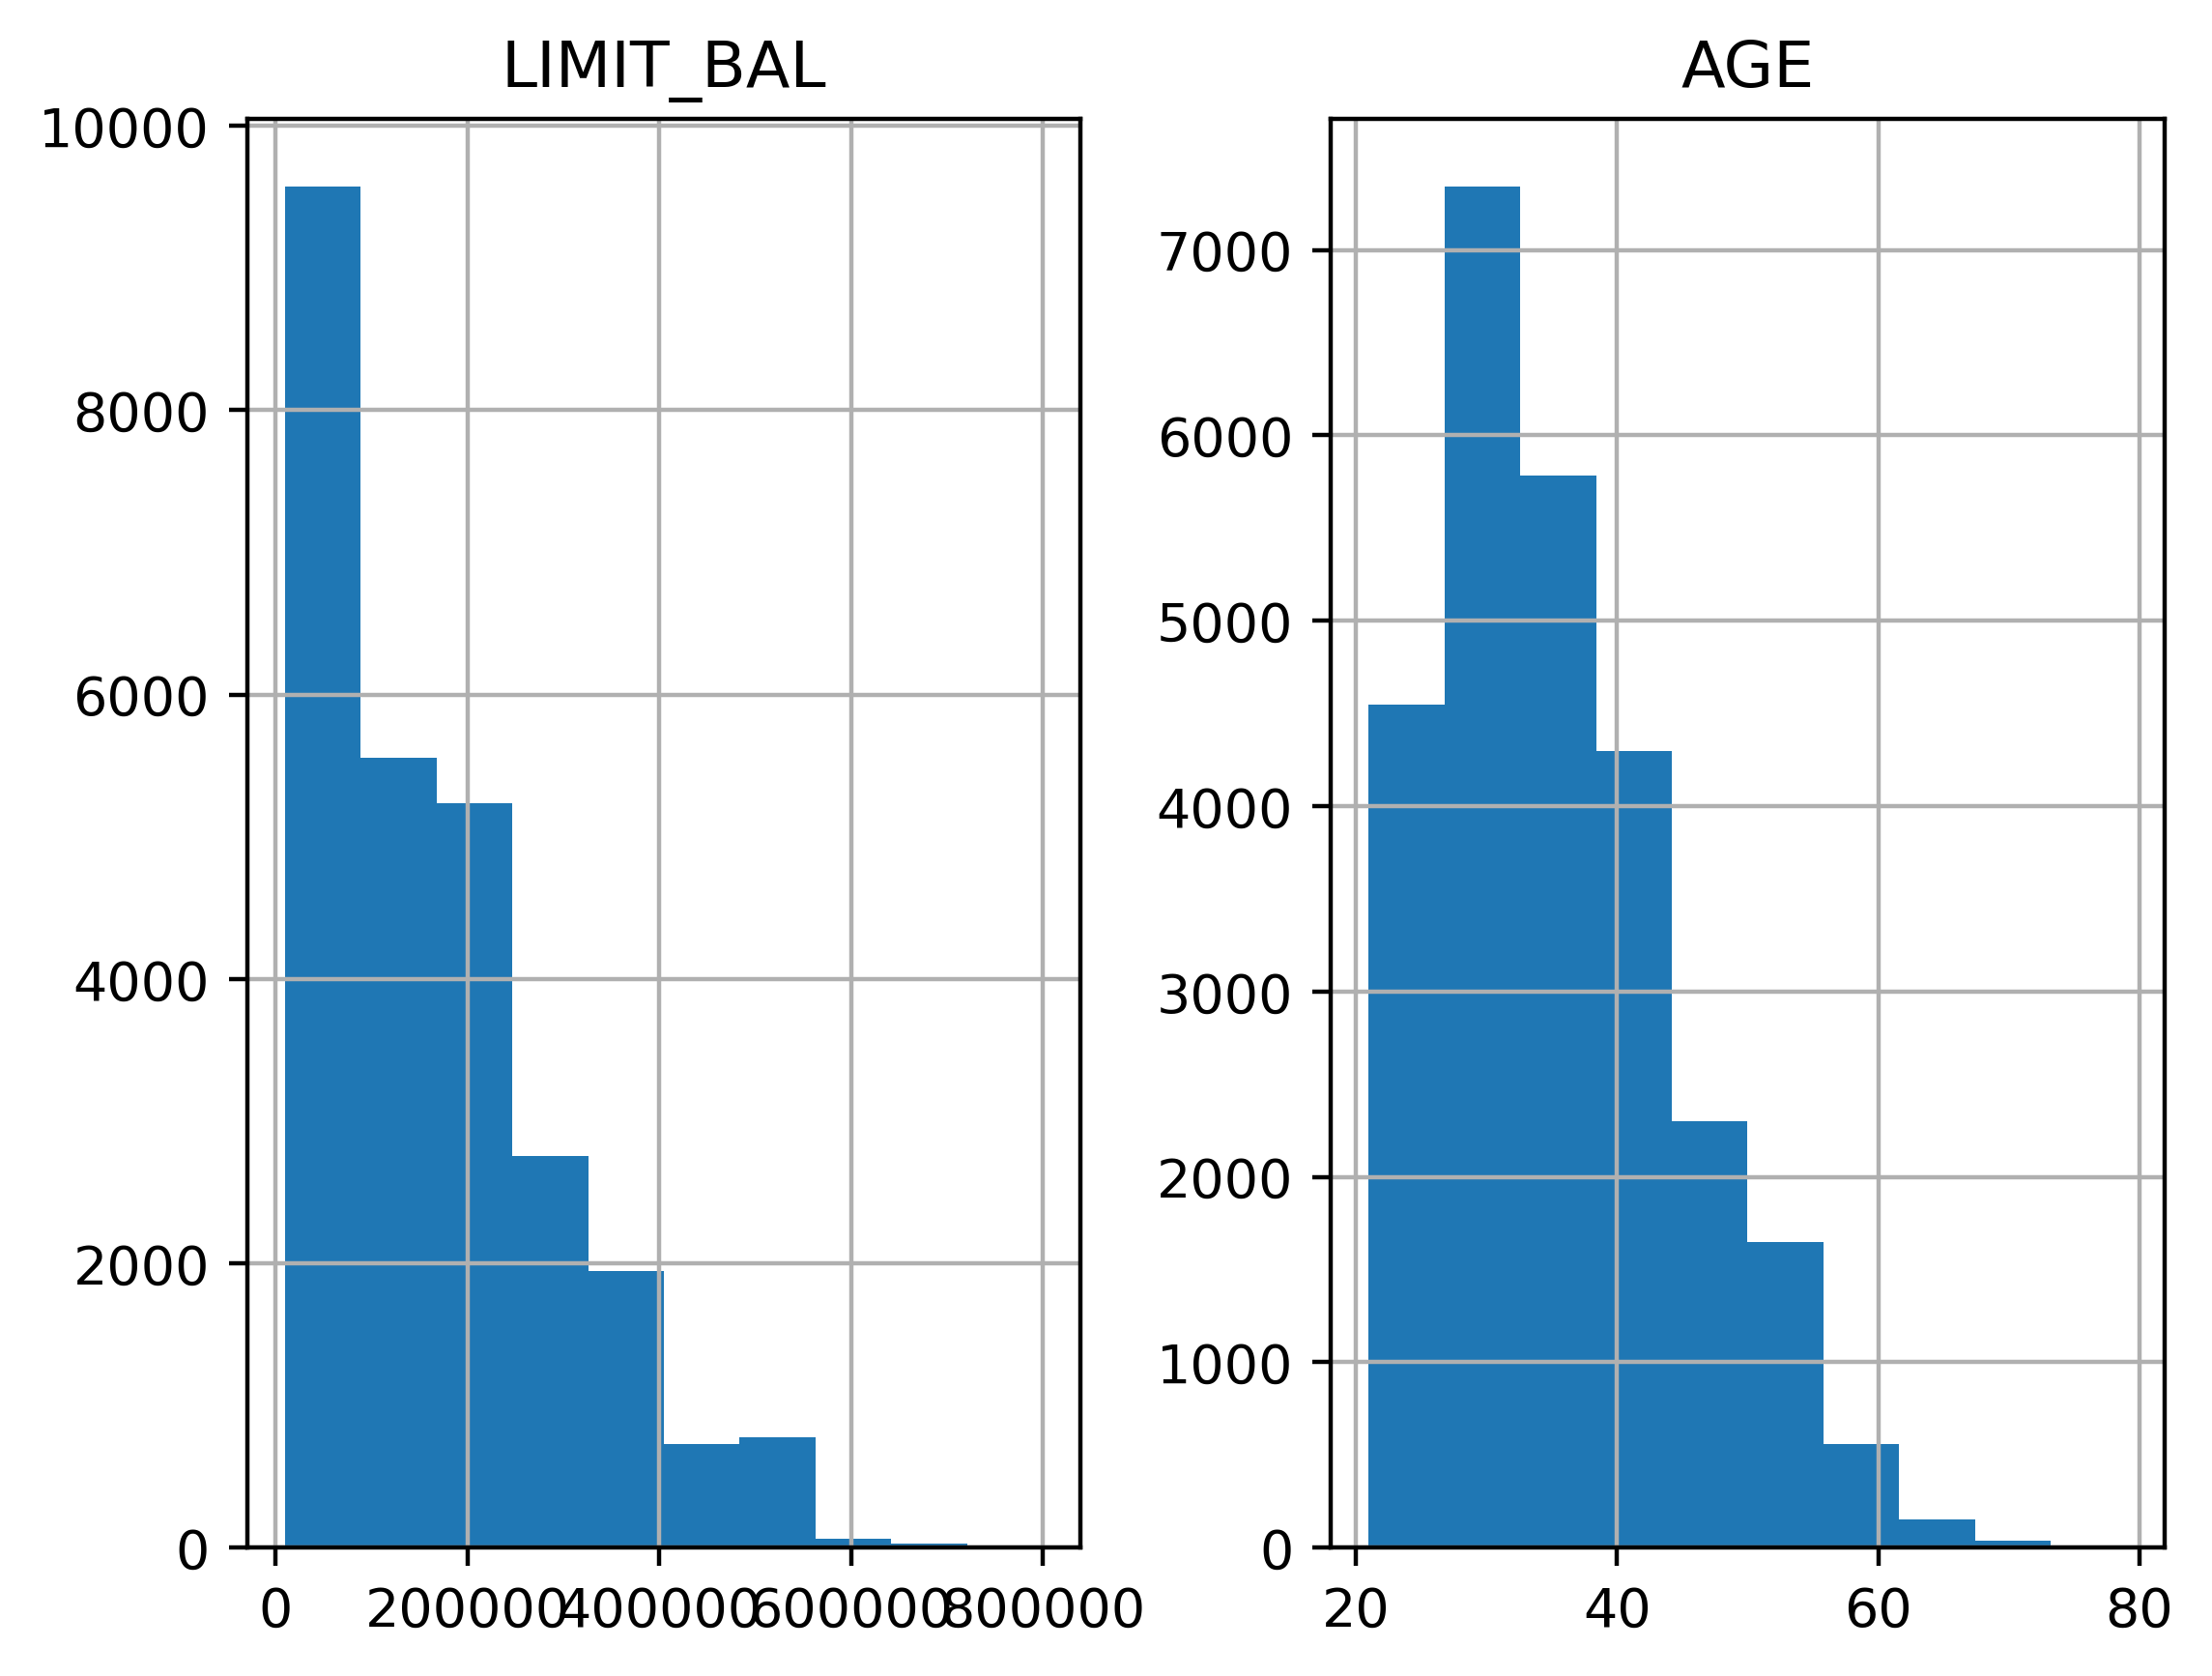

In [35]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [36]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [37]:
# in-place means instead of returning a new DF, this operation will 
# make the change on the existing dataframe

df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [38]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4,
      inplace=True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [39]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

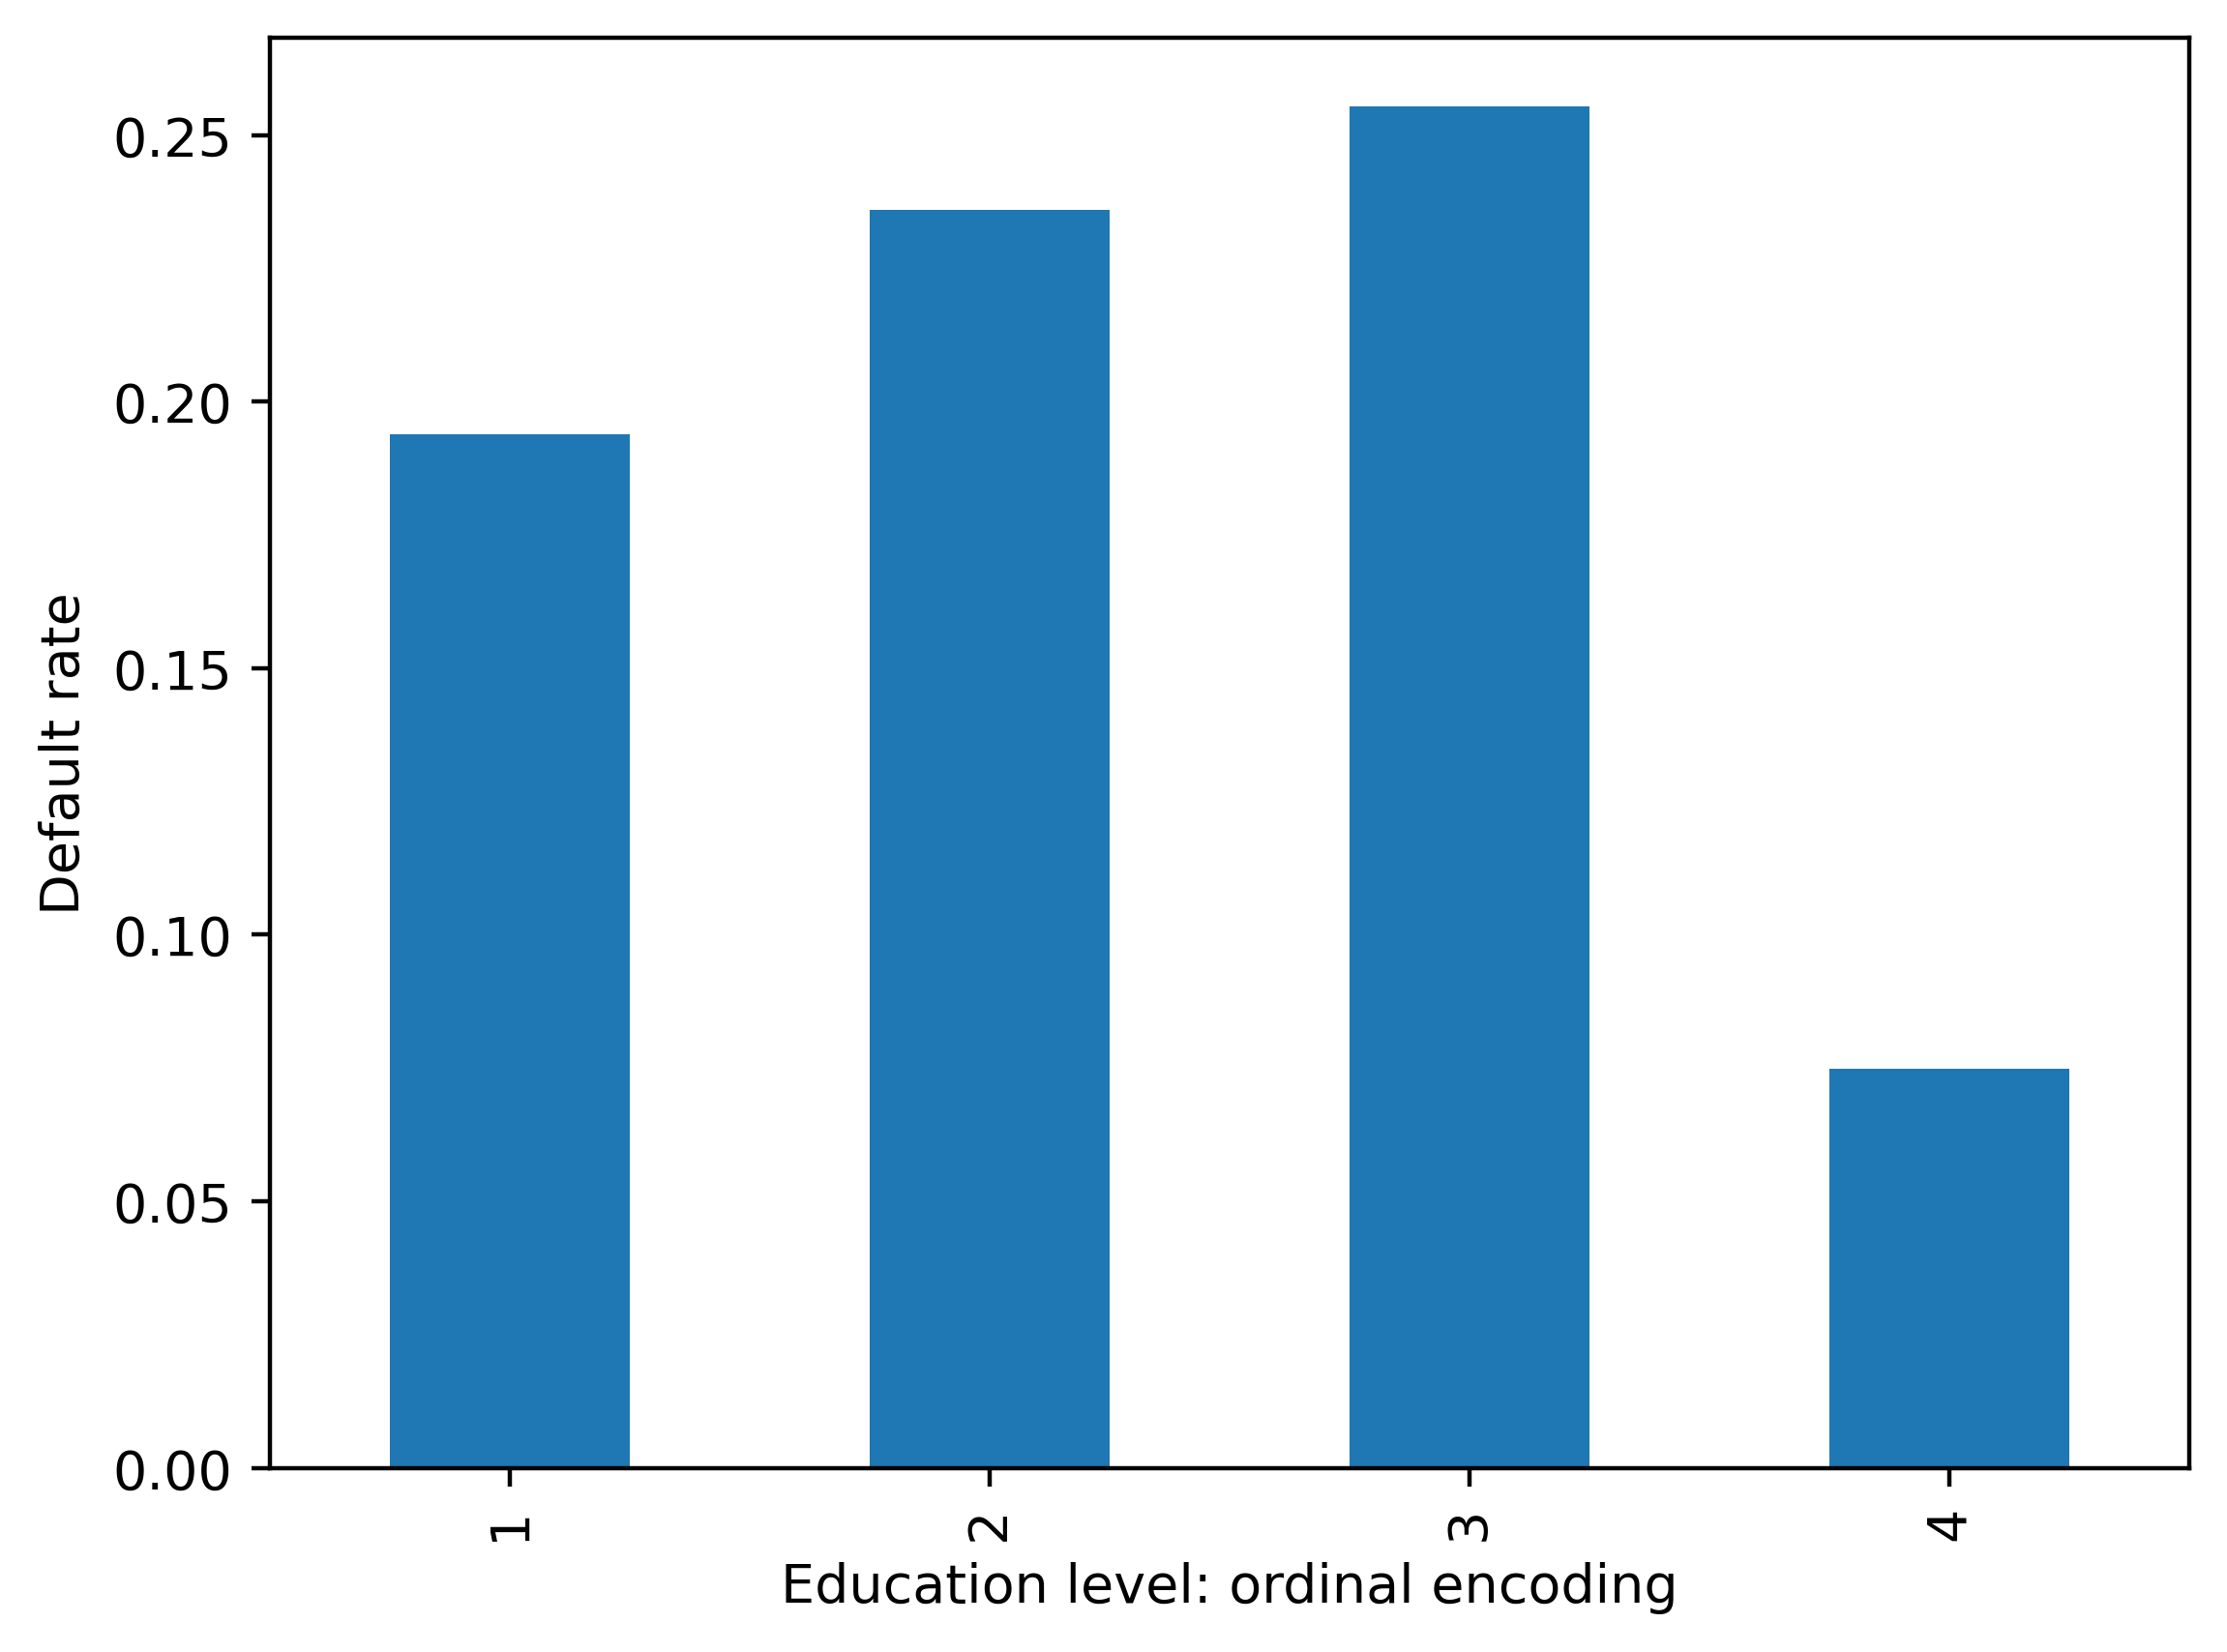

In [40]:
#Deep Dive : Categorical Features

# groupby/agg and bar plot in pandas

df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}) \
    .plot.bar(legend=False)

plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')
plt.show()  # Ensure the plot is displayed


In [41]:
# Performing One hot encoding

#create empty column for categorical labels 

df_clean_2['EDUCATION_CAT'] = 'none'

df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [42]:
# basically reverse engineering the EDUCATION to obtain text labesl

cat_mapping = { 
    1: 'graduate schoool',
    2: 'university',
    3: 'high school',
    4: 'others'
}

In [43]:
# apply the mapping to the origianl EDUCATIOn coumns using .map
# assign the result to the new EDUCATION_CAT

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate schoool
6,1,graduate schoool
7,2,university
8,3,high school
9,3,high school


In [44]:
# getting dummy variables 

edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'], dtype=int)
edu_ohe.head(10)

,graduate schoool,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [45]:
# Concatenating the one-hot encoded DataFrame to the original DF

df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate schoool', 'high school', \
            'university', 'others']].head(10)

,EDUCATION_CAT,graduate schoool,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate schoool,1,0,0,0
6,graduate schoool,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [46]:
# Saving the data file

df_with_ohe.to_csv('/Users/ronishlamsal/Desktop/Python/Knoxville/Chapter_1_cleaned_data.csv', index=False)

In [47]:
# Exploring the Financial History Features in the Dataset

df = pd.read_csv('/Users/ronishlamsal/Desktop/Python/Knoxville/Chapter_1_cleaned_data.csv')

In [48]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate schoool,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [49]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [50]:
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

<Axes: >

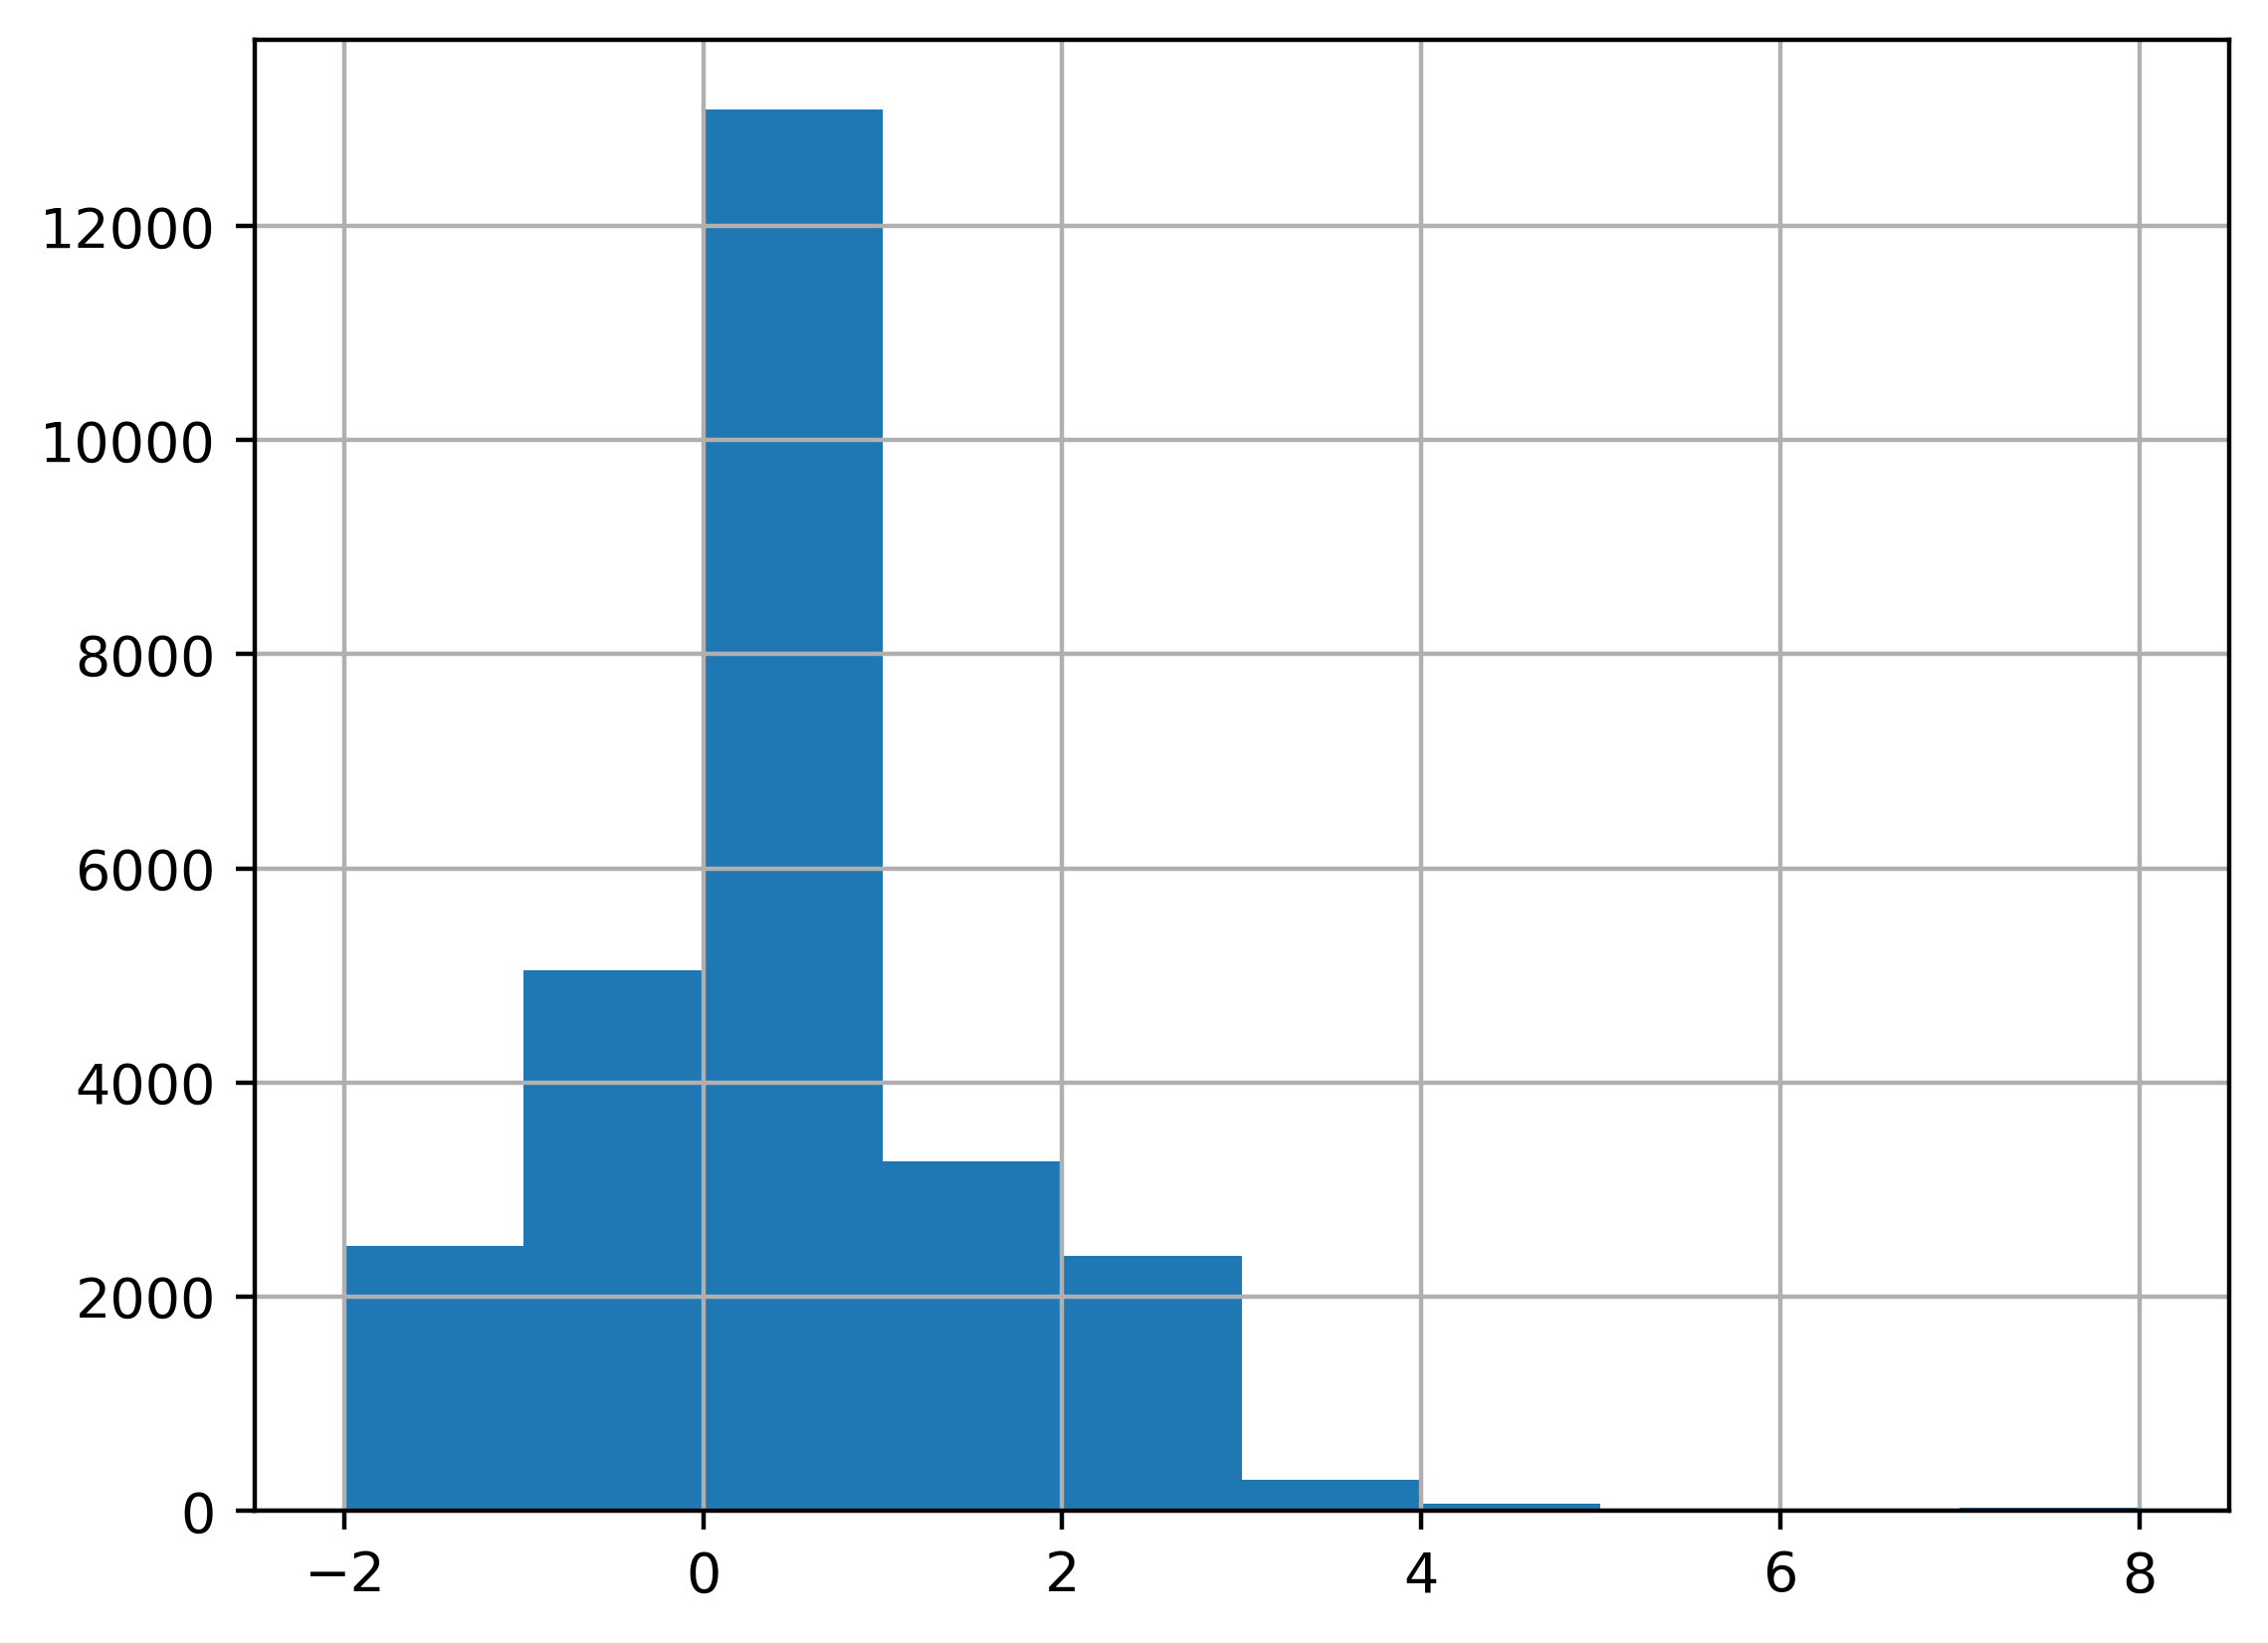

In [51]:
df[pay_feats[0]].hist()

In [52]:
import numpy as np

pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

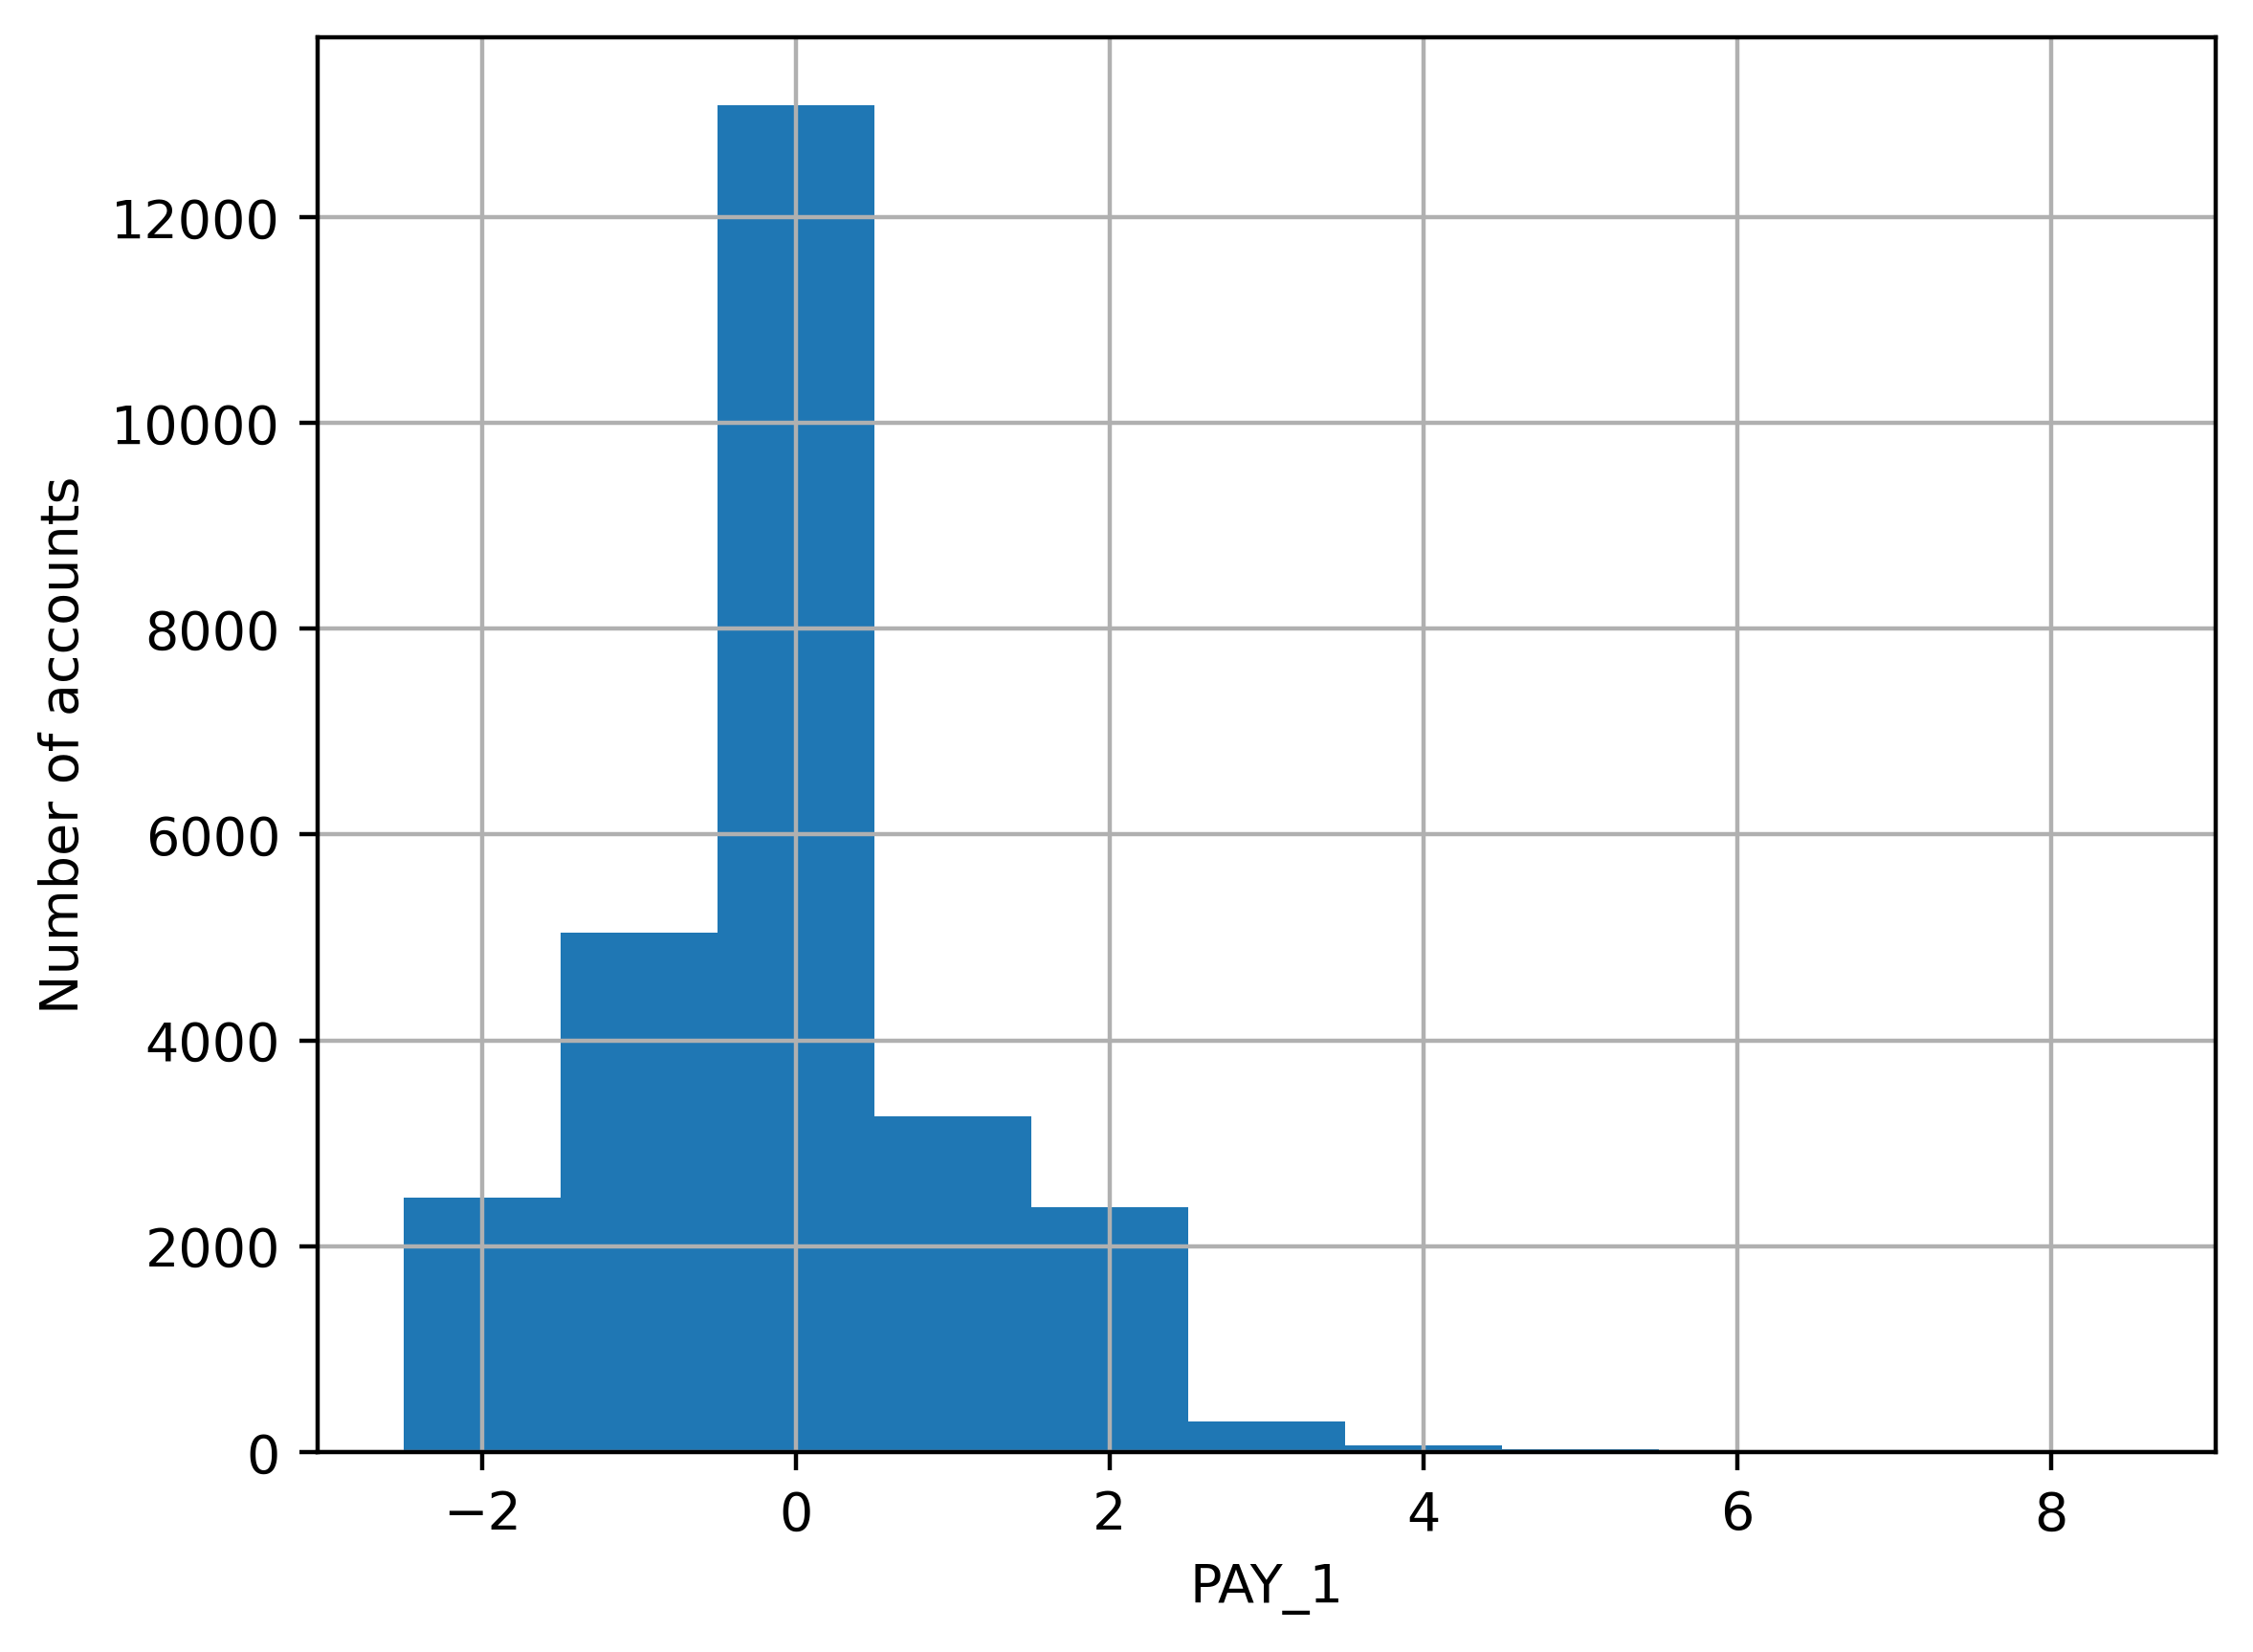

In [53]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

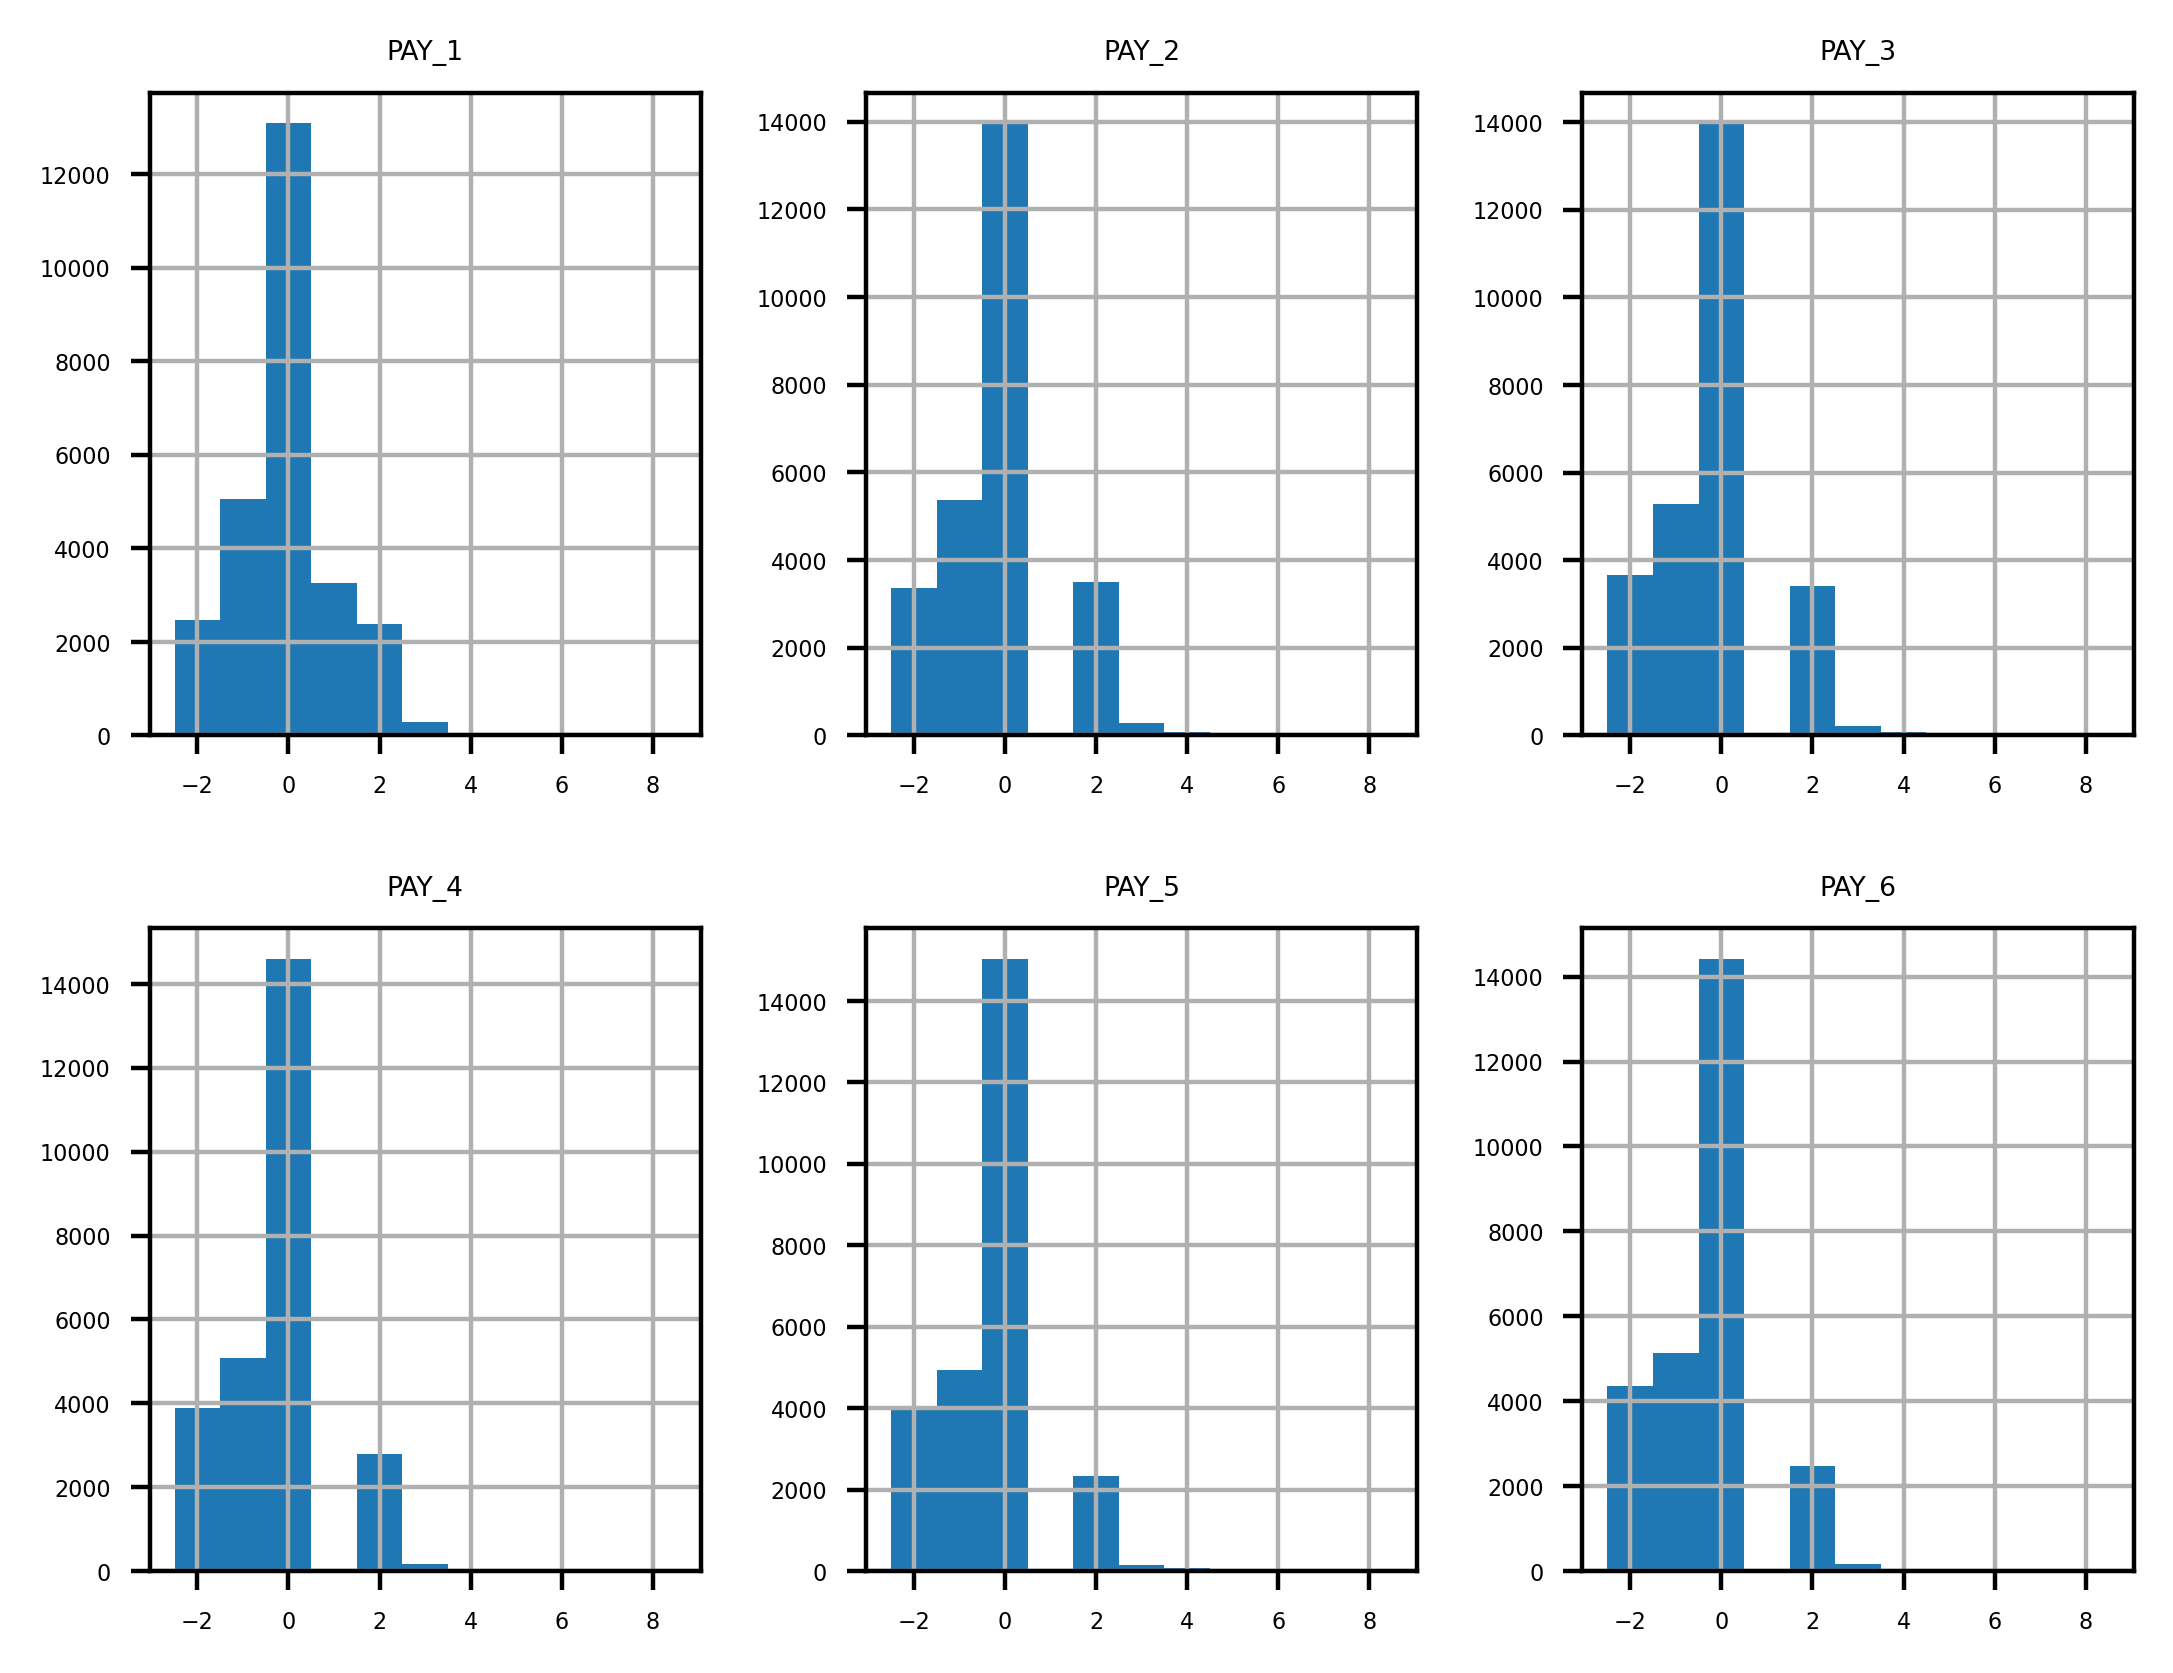

In [54]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [55]:
#Looking closely at PAY2 snd PAY3 column

df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [56]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [57]:
df['default payment next month'].mean() #this mean indicates the draction of accounts that defaulted


0.2217971797179718

 Most machine learning classification models are designed to work with balanced data
 However, in practice, real data is rarely balanced. 
 Some methods used to mitigate this

 1. Undersampling(throws out from the majority to balance the data)
 2. Oversampling (the minority calss, randomly adding duplciate samples of minority class)
 3. Wegithing samples




In [58]:
# importing the class 

from sklearn.linear_model import LogisticRegression

my_lr = LogisticRegression()

print(my_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [59]:
my_lr

LogisticRegression()

In [60]:
# try to explicitly provide ever keyword parameter to the model when you create the object. 

my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                              intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn',
                              n_jobs=None, penalty='l2', random_state=None, solver='warn',
                              tol=0.0001, verbose=0, warm_start=False)

In [61]:
my_new_lr.solver = 'lbfgs'

In [62]:
print(my_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [63]:
# Hyperparameter is like an option that you supply to the model, before fitting it to the data
# C is a hyper parameter

my_new_lr.C= 0.1
my_new_lr.solver = 'liblinear'
print(my_new_lr.get_params())

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [64]:
X = df['EDUCATION'][0:10].values.reshape(-1,1) # -1,1 converts 1D array 
                                            # into 2D array with 1 col and automatically adjust nu of rows 
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [65]:
#Corresponding first 10 values of the response variable

Y = df['default payment next month'][0:10].values
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
#Scikit expects the input features in 2D array but not the target or output(1D array is fine)

# Fitting our logistic regression

y = Y
my_new_lr.fit(X, y)

InvalidParameterError: The 'multi_class' parameter of LogisticRegression must be a str among {'auto', 'multinomial', 'ovr'}. Got 'warn' instead.

In [67]:
# Create a LogisticRegression model with the correct multi_class parameter
my_new_lr = LogisticRegression(multi_class='auto')

# Now fit the model with X (input features) and y (target)
my_new_lr.fit(X, y)

LogisticRegression()

In [68]:
#The model is now a trained model.
# Lets try the next 10 rows fromt he EDUCATION feature 

new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [69]:
# Making new predictions 

my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
# Looking at true values

df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [71]:
# Generating Synthetic data

np.random.seed(seed=1)

X = np.random.uniform(low= 0.0, high =10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [73]:

#Data for linear Regression

# y = ax + b +N(mean,std)

# Code to creater linear data with Gaussian noise

np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept



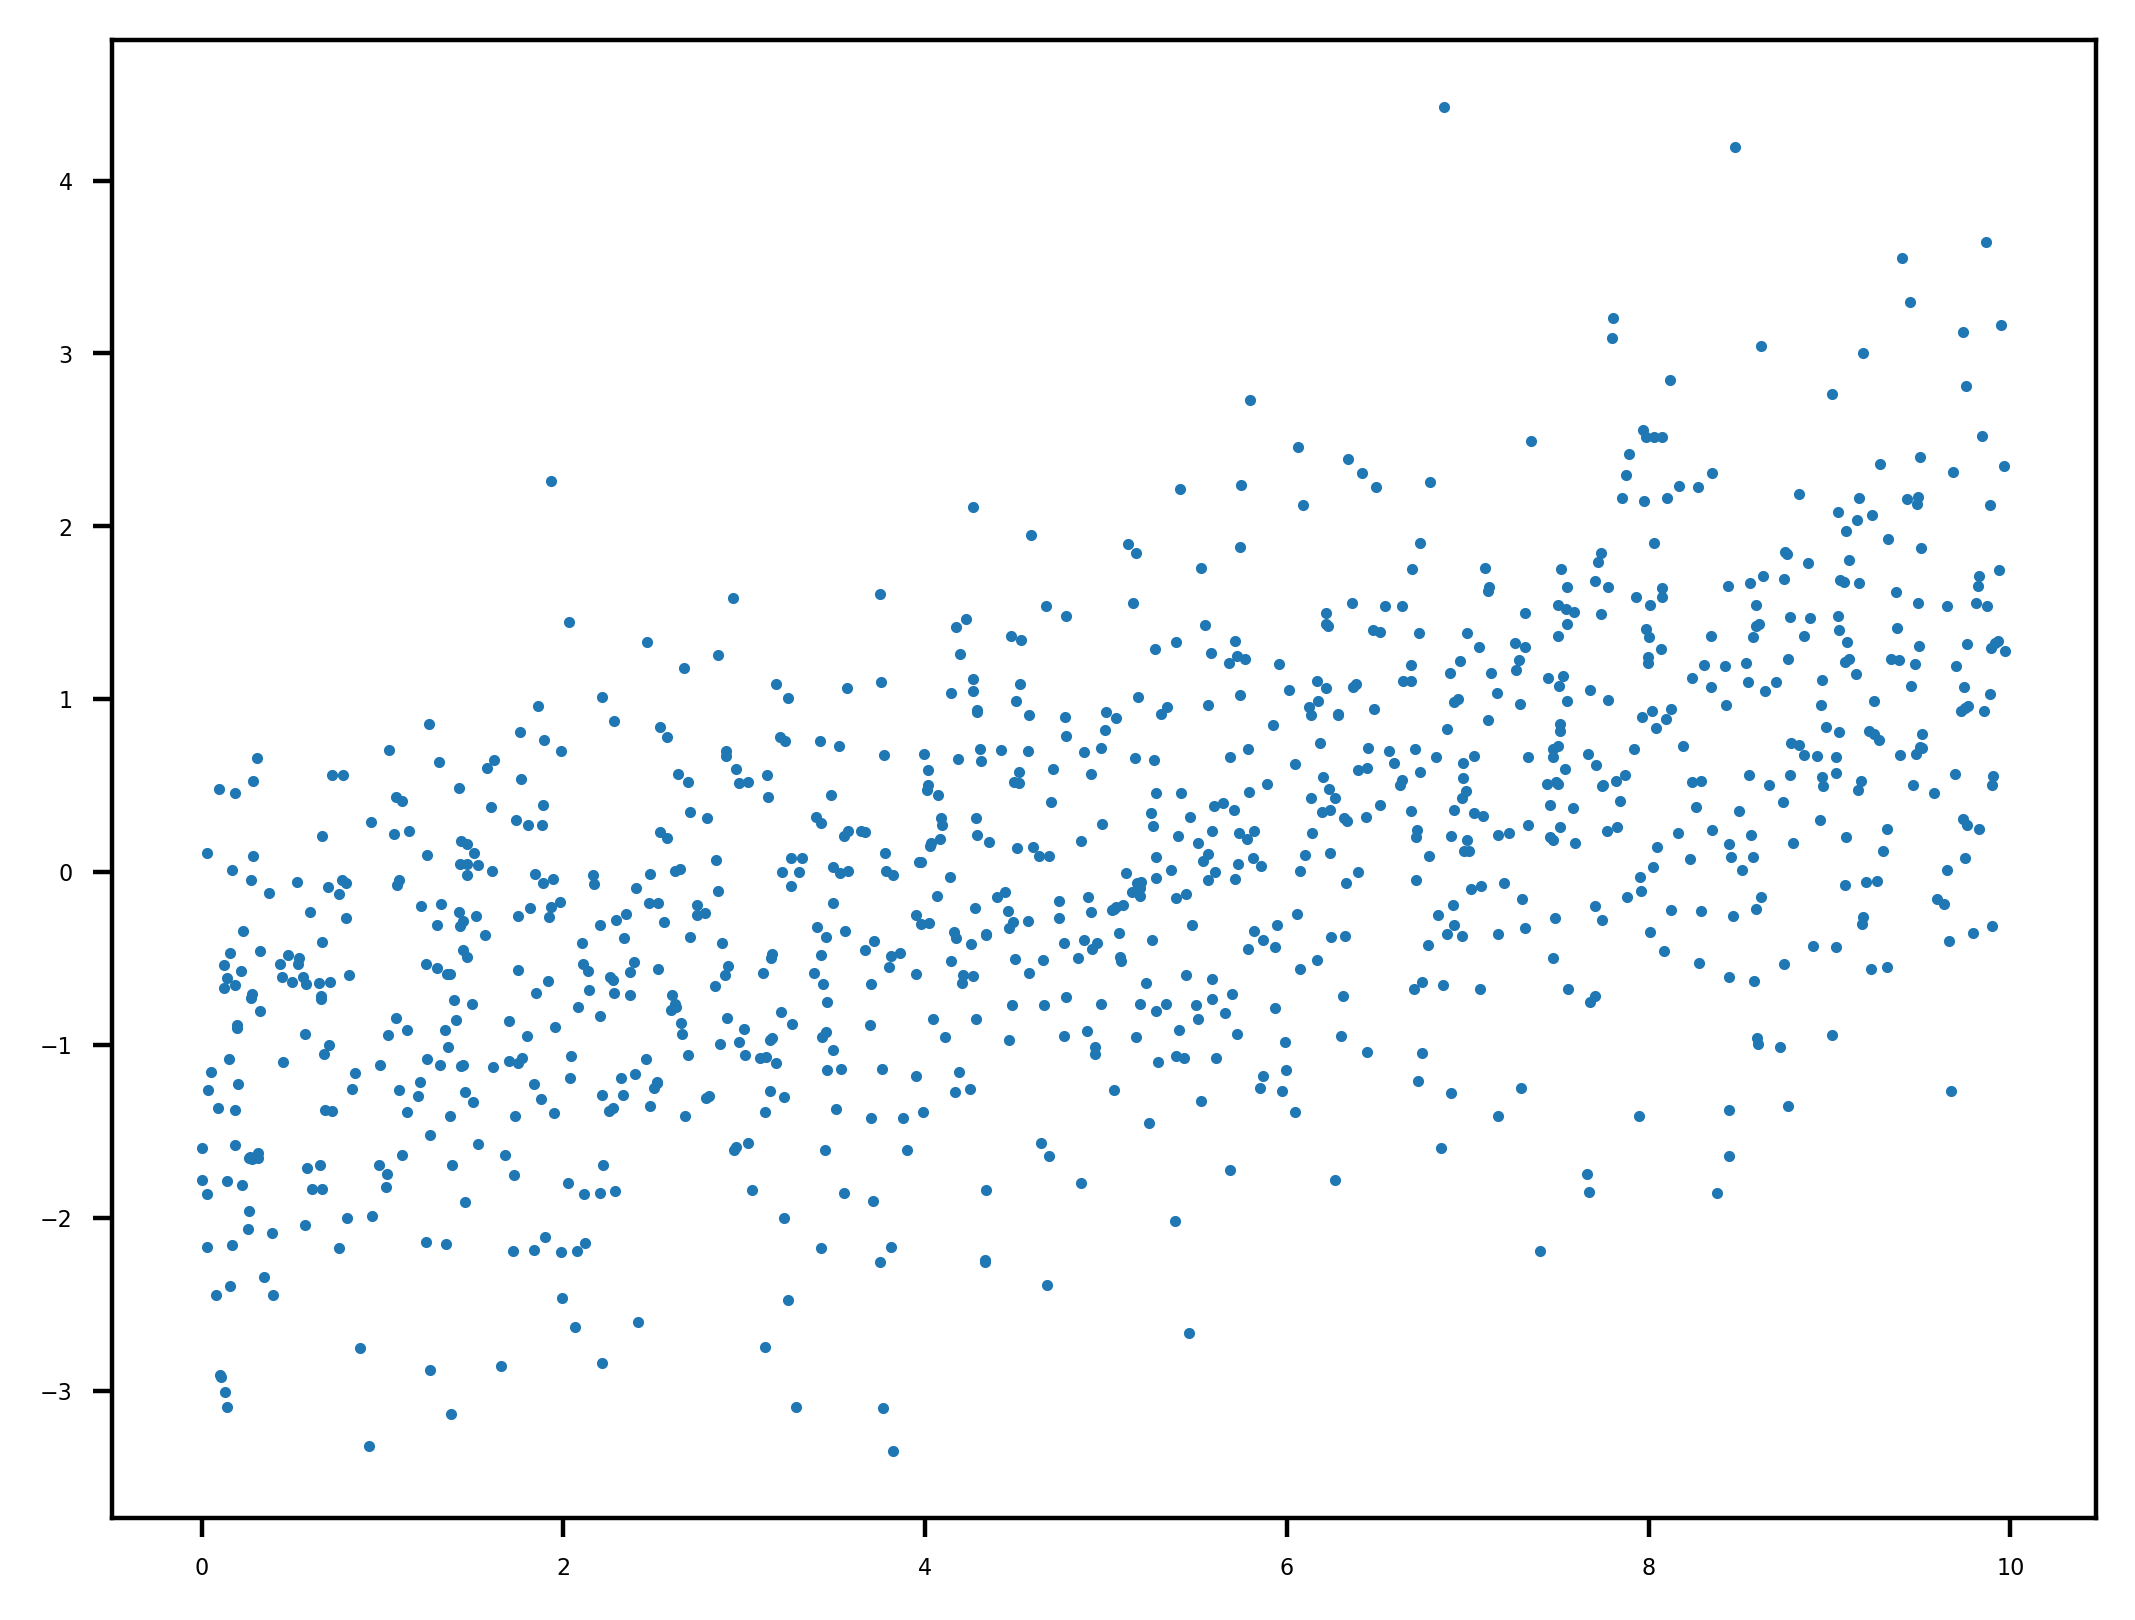

In [74]:
#Plotting this to see 

mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)

In [75]:
# Determining a line of best fit using scikit-learn

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [76]:
print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [77]:
# Fitting the model and examining the coefficients

lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [78]:
#Comparing the fit to the values for coefficient and intercept we gave

# Using the model to predict values
y_pred = lin_reg.predict(X.reshape(-1,1))

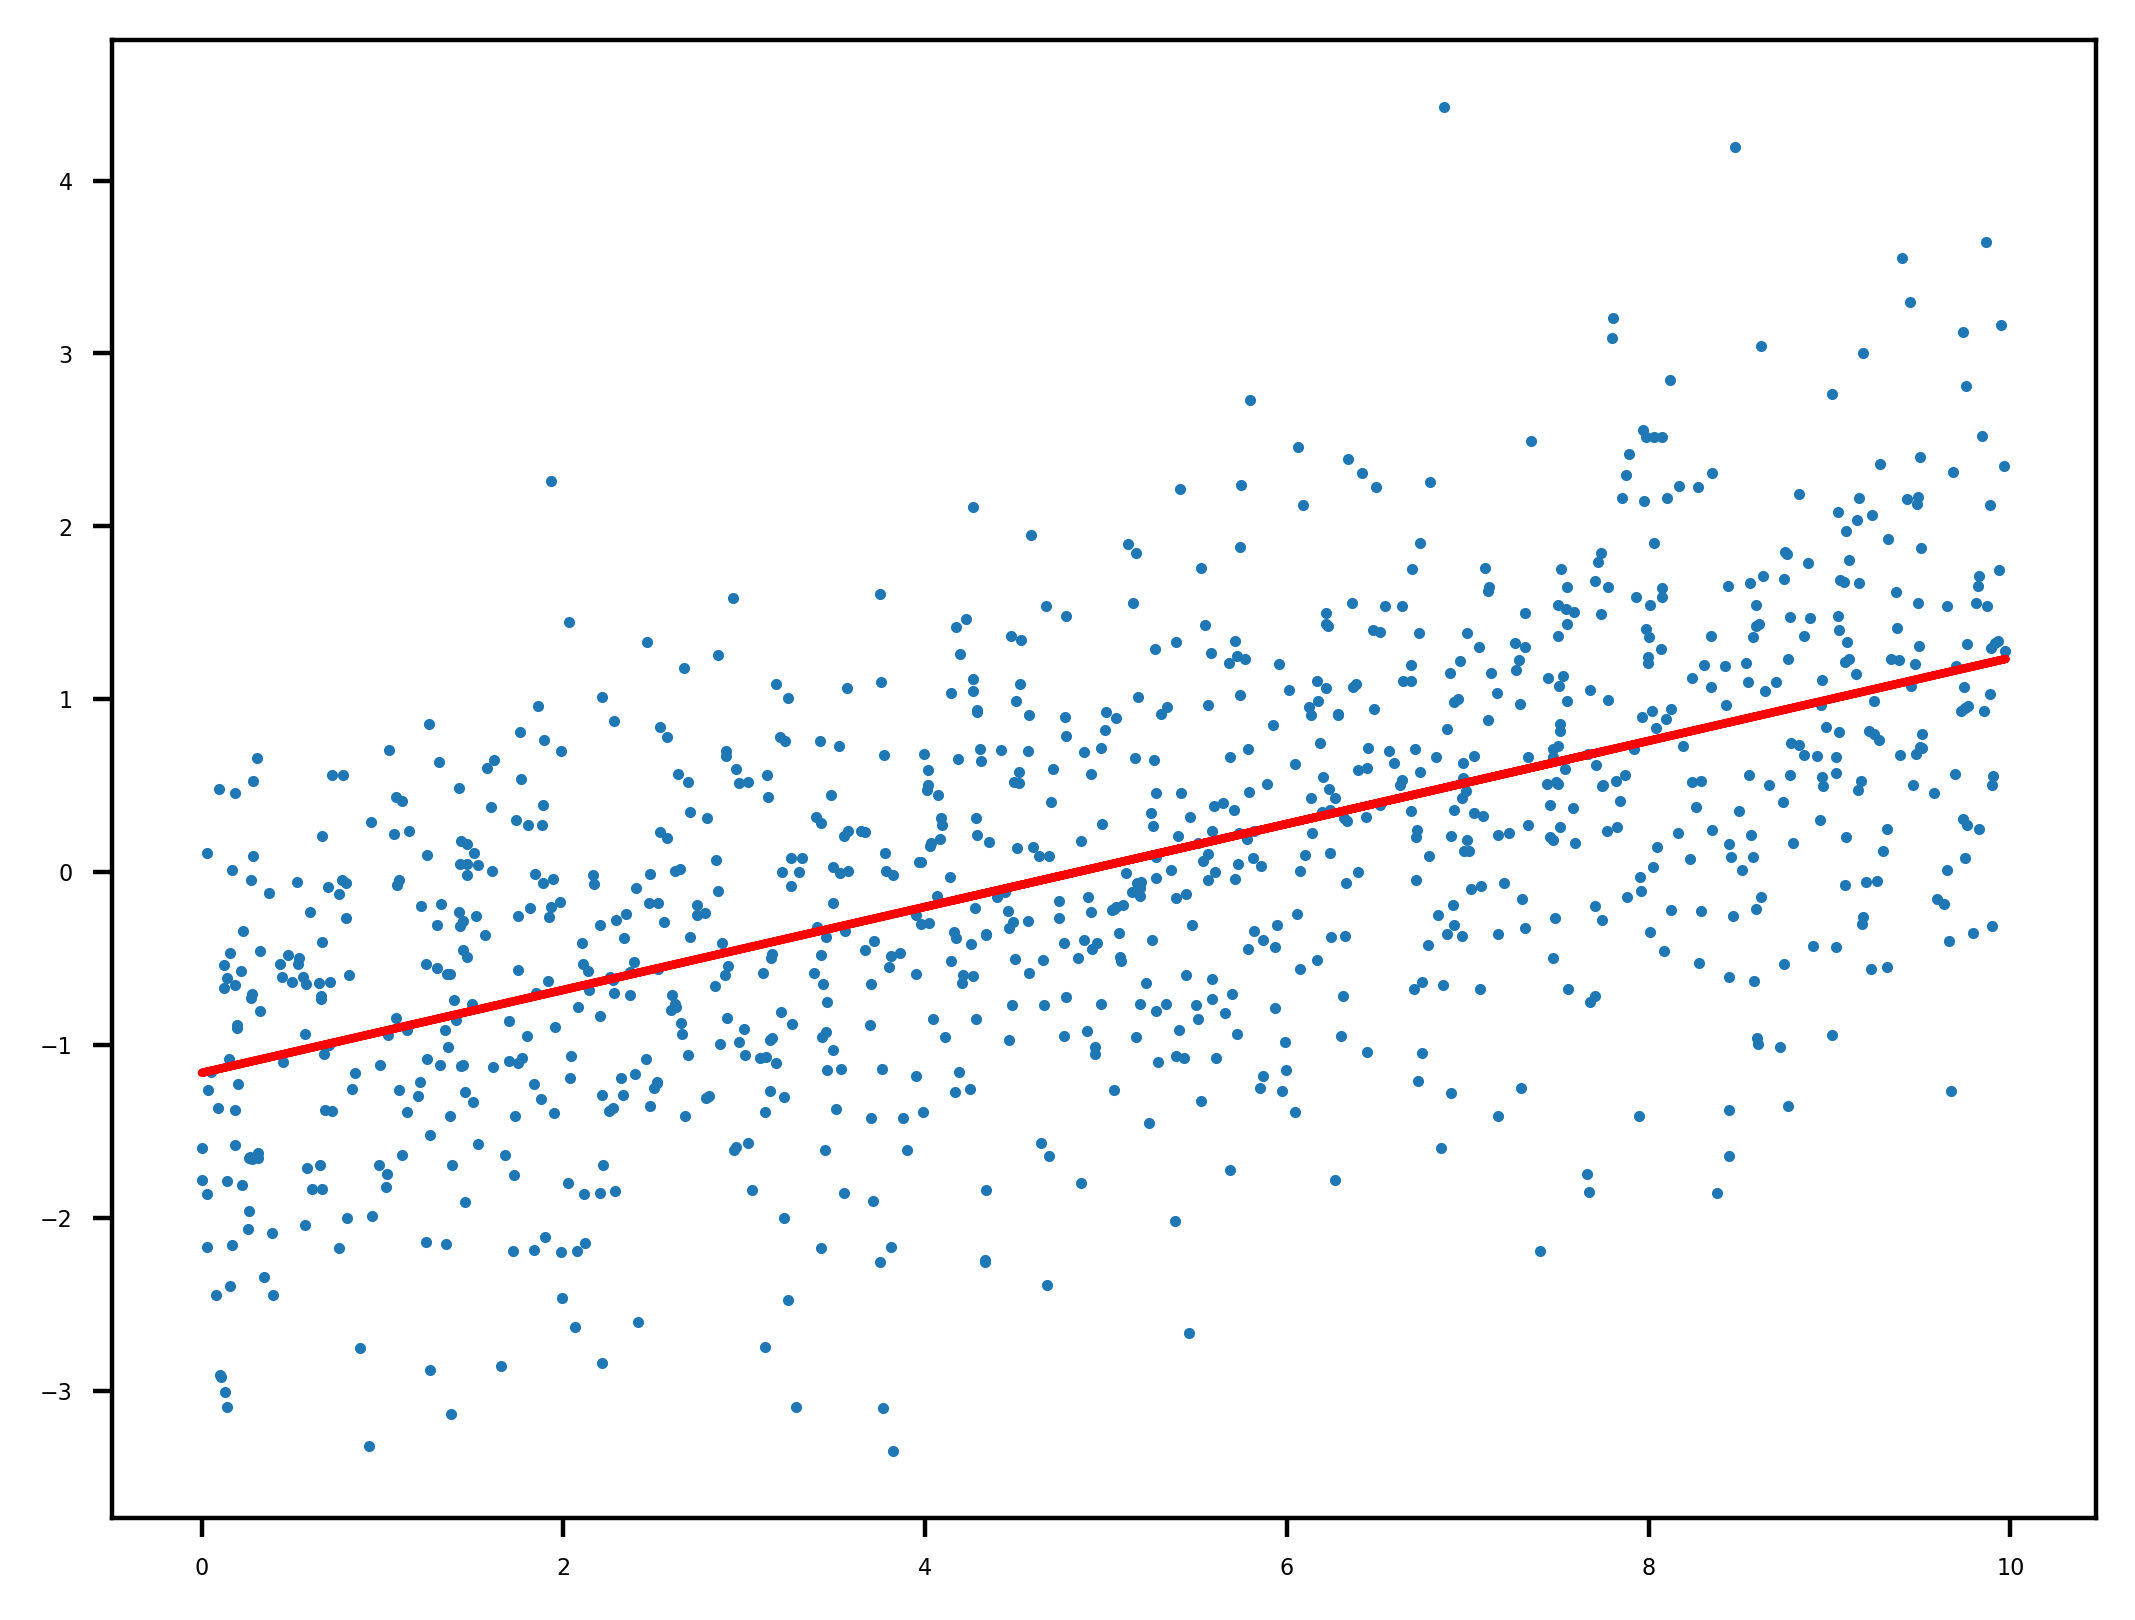

In [79]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred, 'r')

In [80]:
# Model Performance Metrics for Binary Classification
# Appropriateness of the metric for the problem 
#Splitting the Data: Training and Testing Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].
  values,
  test_size=0.2, random_state=24)


In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [82]:
np.mean(y_train)

0.223102526838873

In [83]:
np.mean(y_test)

0.21657603600225014

In [84]:
# Out-of-time testing

#Classification Accuracy

from sklearn.linear_model import LogisticRegression

example_lr = LogisticRegression()

In [85]:
print(example_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [86]:
example_lr.C= 0.1
example_lr.solver = 'liblinear'

In [87]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [88]:
y_pred = example_lr.predict(X_test)

In [89]:
# Accuracy is defined as the proportion of samples that were correctly
# classified

# One way to measure is to create a logical mask that is True then 
# measuring the proportion

is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [90]:
# Or can be calculated by .score method in scikit-learn

example_lr.score(X_test, y_test)

0.7834239639977498

In [91]:
# or could import model performance metrics 'accuracy_score'

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [92]:
# True Positive Rate, False Positive Rate and Confusion Matrix

# True Positive Rate = TP/P(positive class) = Proption of these that we successfully predict as positive
# False Negative rate , FNR = FN/P , proportion of +testing samples that we incorrectly predicted as negative

# Since all positive samples are either correclt or incorrectly predicted 
# TPR + FNR = 1 

# Similarly, TNR = TN/N, FPR = FP/N THR + FPR = 1

# Objective is to have TN and TP be relatively large and FP and FN be small. 

# Exercise 9: Calculating the True and False Positive and Negative Rates and COnfusion Matrix in Python

P = sum(y_test)
P

1155

In [93]:
# Calculating TP means where true label is 1 and prediction is also 1. 

TP = sum( (y_test==1) & (y_pred==1))
TP

0

In [94]:
TPR = TP/P
print(TPR)

FN = sum((y_test==1) & (y_pred==0))
print(FN)

FNR = FN/P
print(FNR) 

0.0
1155
1.0


In [95]:
N = sum(y_test==0)
print(N)

TN = sum((y_test==0) & (y_pred==0))
print(TN)

FP = sum((y_test==0) & (y_pred==1))
print(FP)

TNR = TN/N
FPR = FP/N

print('The true negative rate is {} and the false positive rate is {}'.format(TNR,FPR))

4178
4178
0
The true negative rate is 1.0 and the false positive rate is 0.0


In [96]:
# Creating a confusion matrix in scikit-learn 

metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

# Other metrics to used are recall, sensitivity, precision 

In [98]:
# Threshold is 0.5 for labeling it negative or postive 
# But we can change it manually 

# Obtaining predicted probabilites for the testing samples

y_pred_proba = example_lr.predict_proba(X_test)
print(y_pred_proba)

[[0.77423402 0.22576598]
 [0.77423402 0.22576598]
 [0.78792915 0.21207085]
 ...
 [0.78792915 0.21207085]
 [0.78792915 0.21207085]
 [0.78792915 0.21207085]]


In [99]:
# Calculating the sum of predicted probabilites 

prob_sum = np.sum(y_pred_proba, 1)
print(prob_sum)

[1. 1. 1. ... 1. 1. 1.]


In [100]:
prob_sum.shape

(5333,)

In [101]:
np.unique(prob_sum)

array([1.])

In [102]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <BarContainer object of 10 artists>)

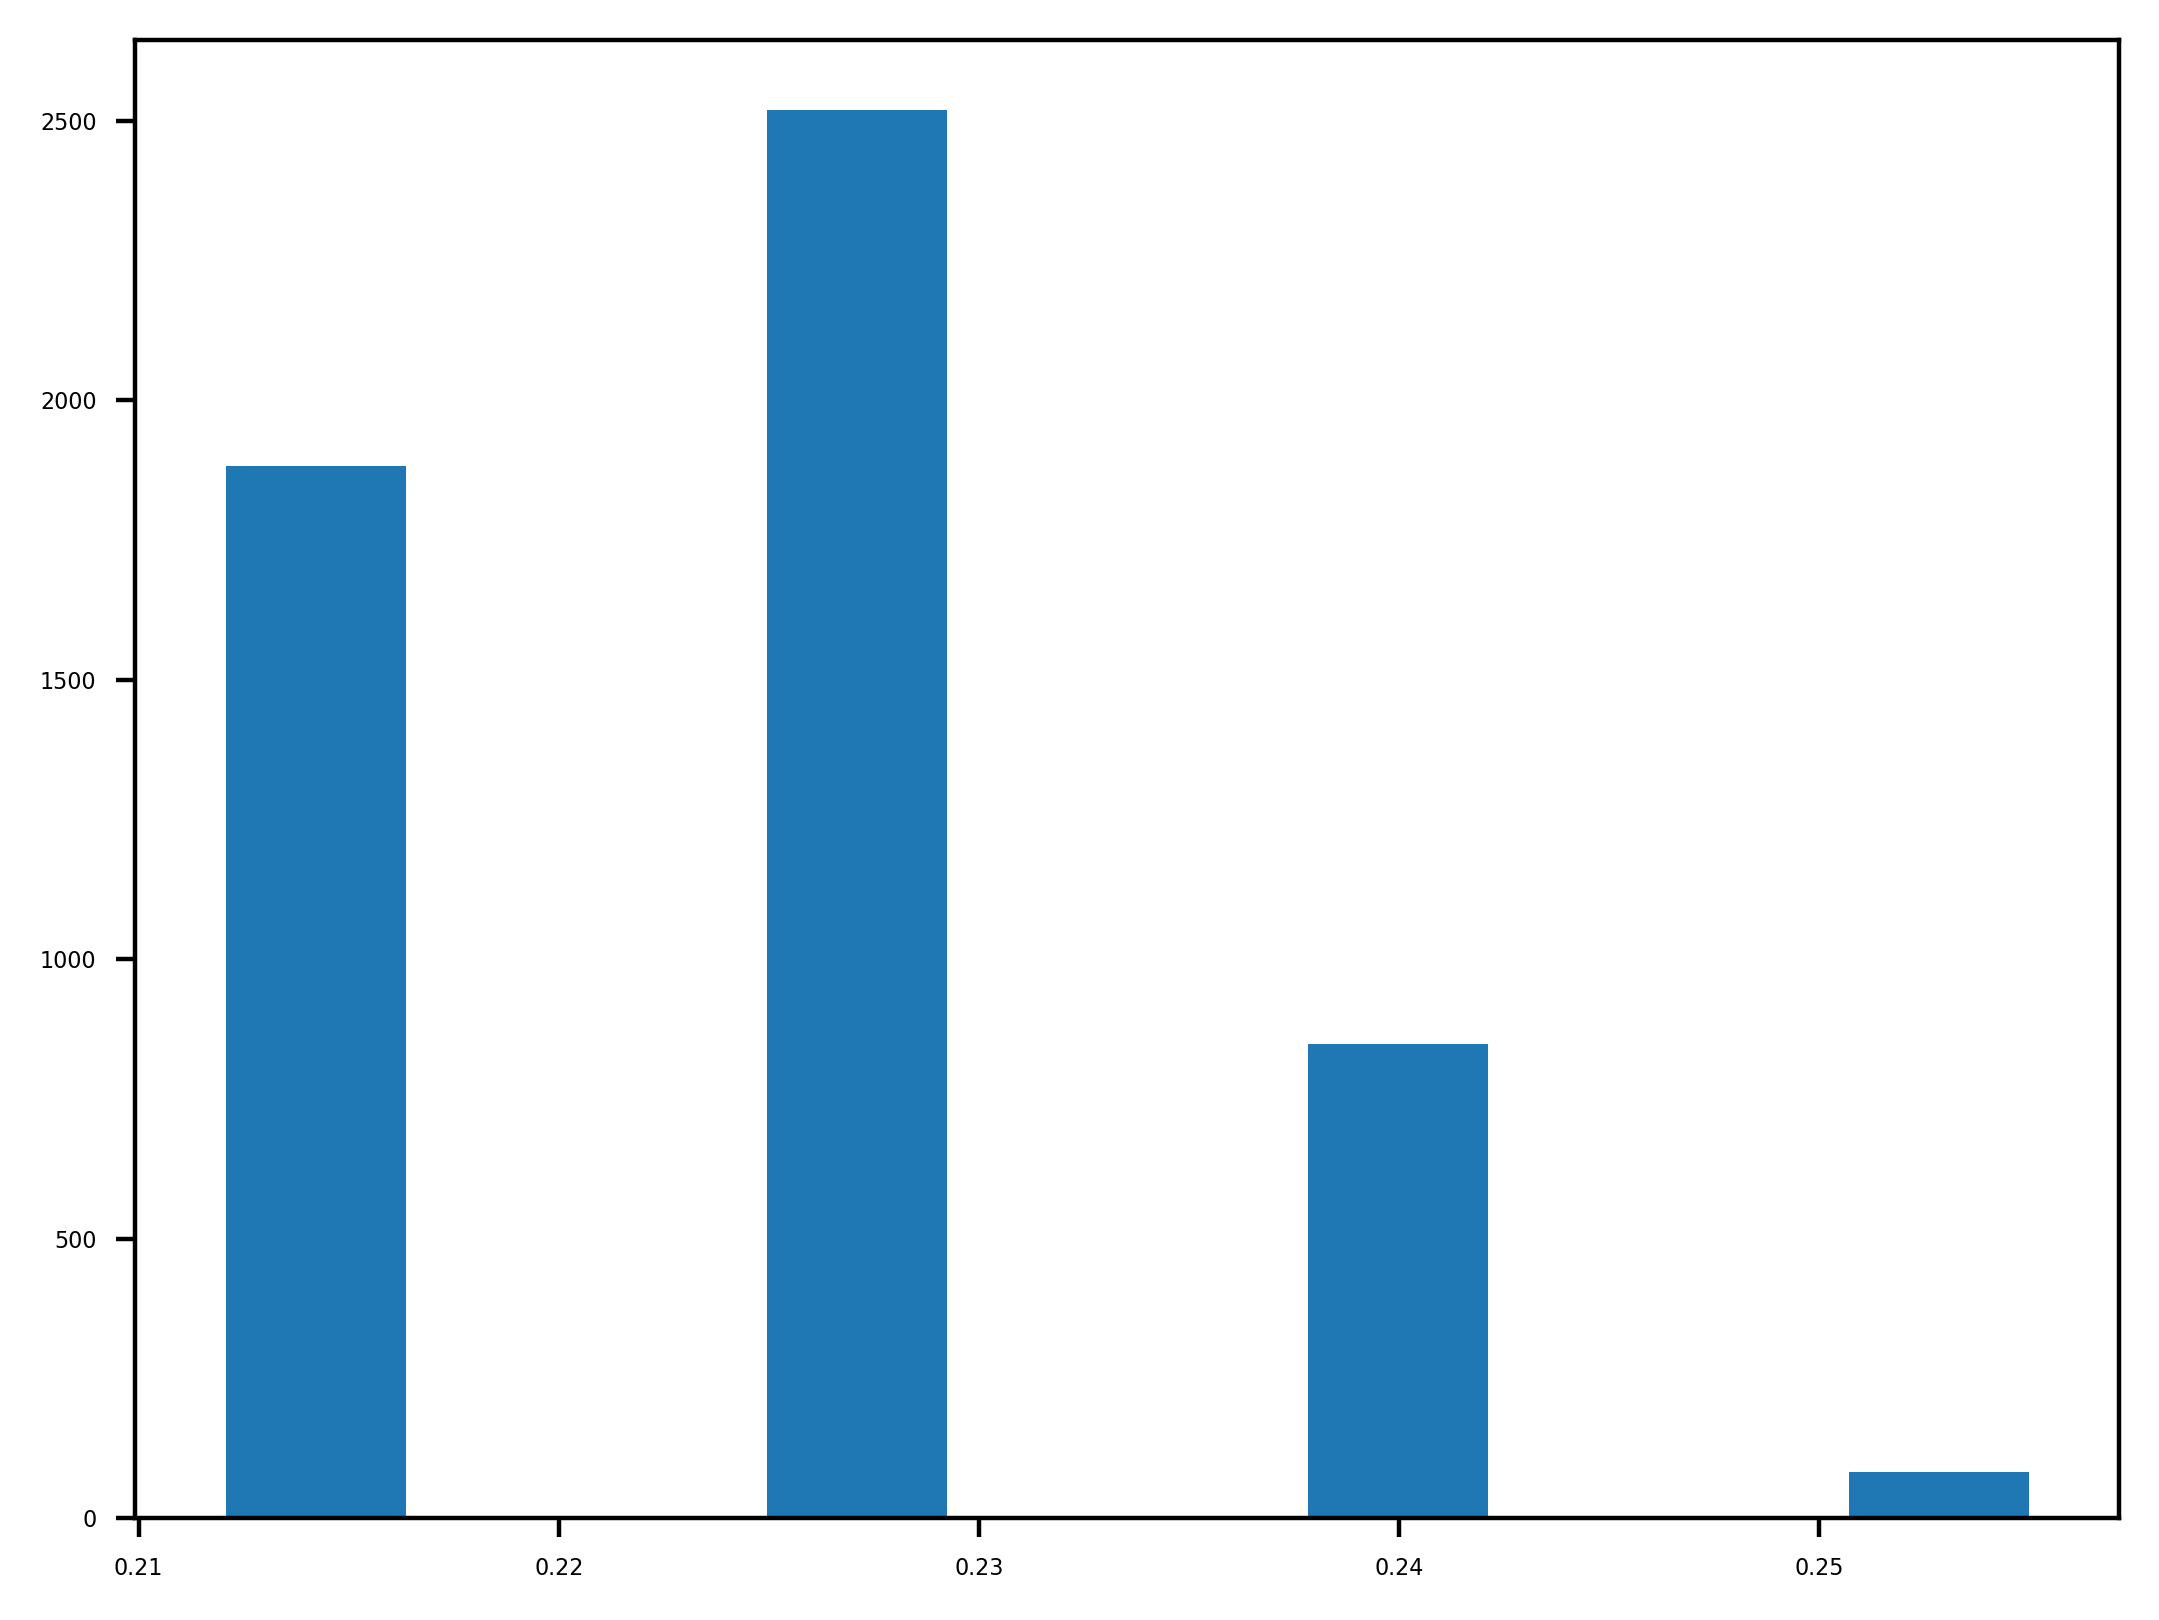

In [103]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

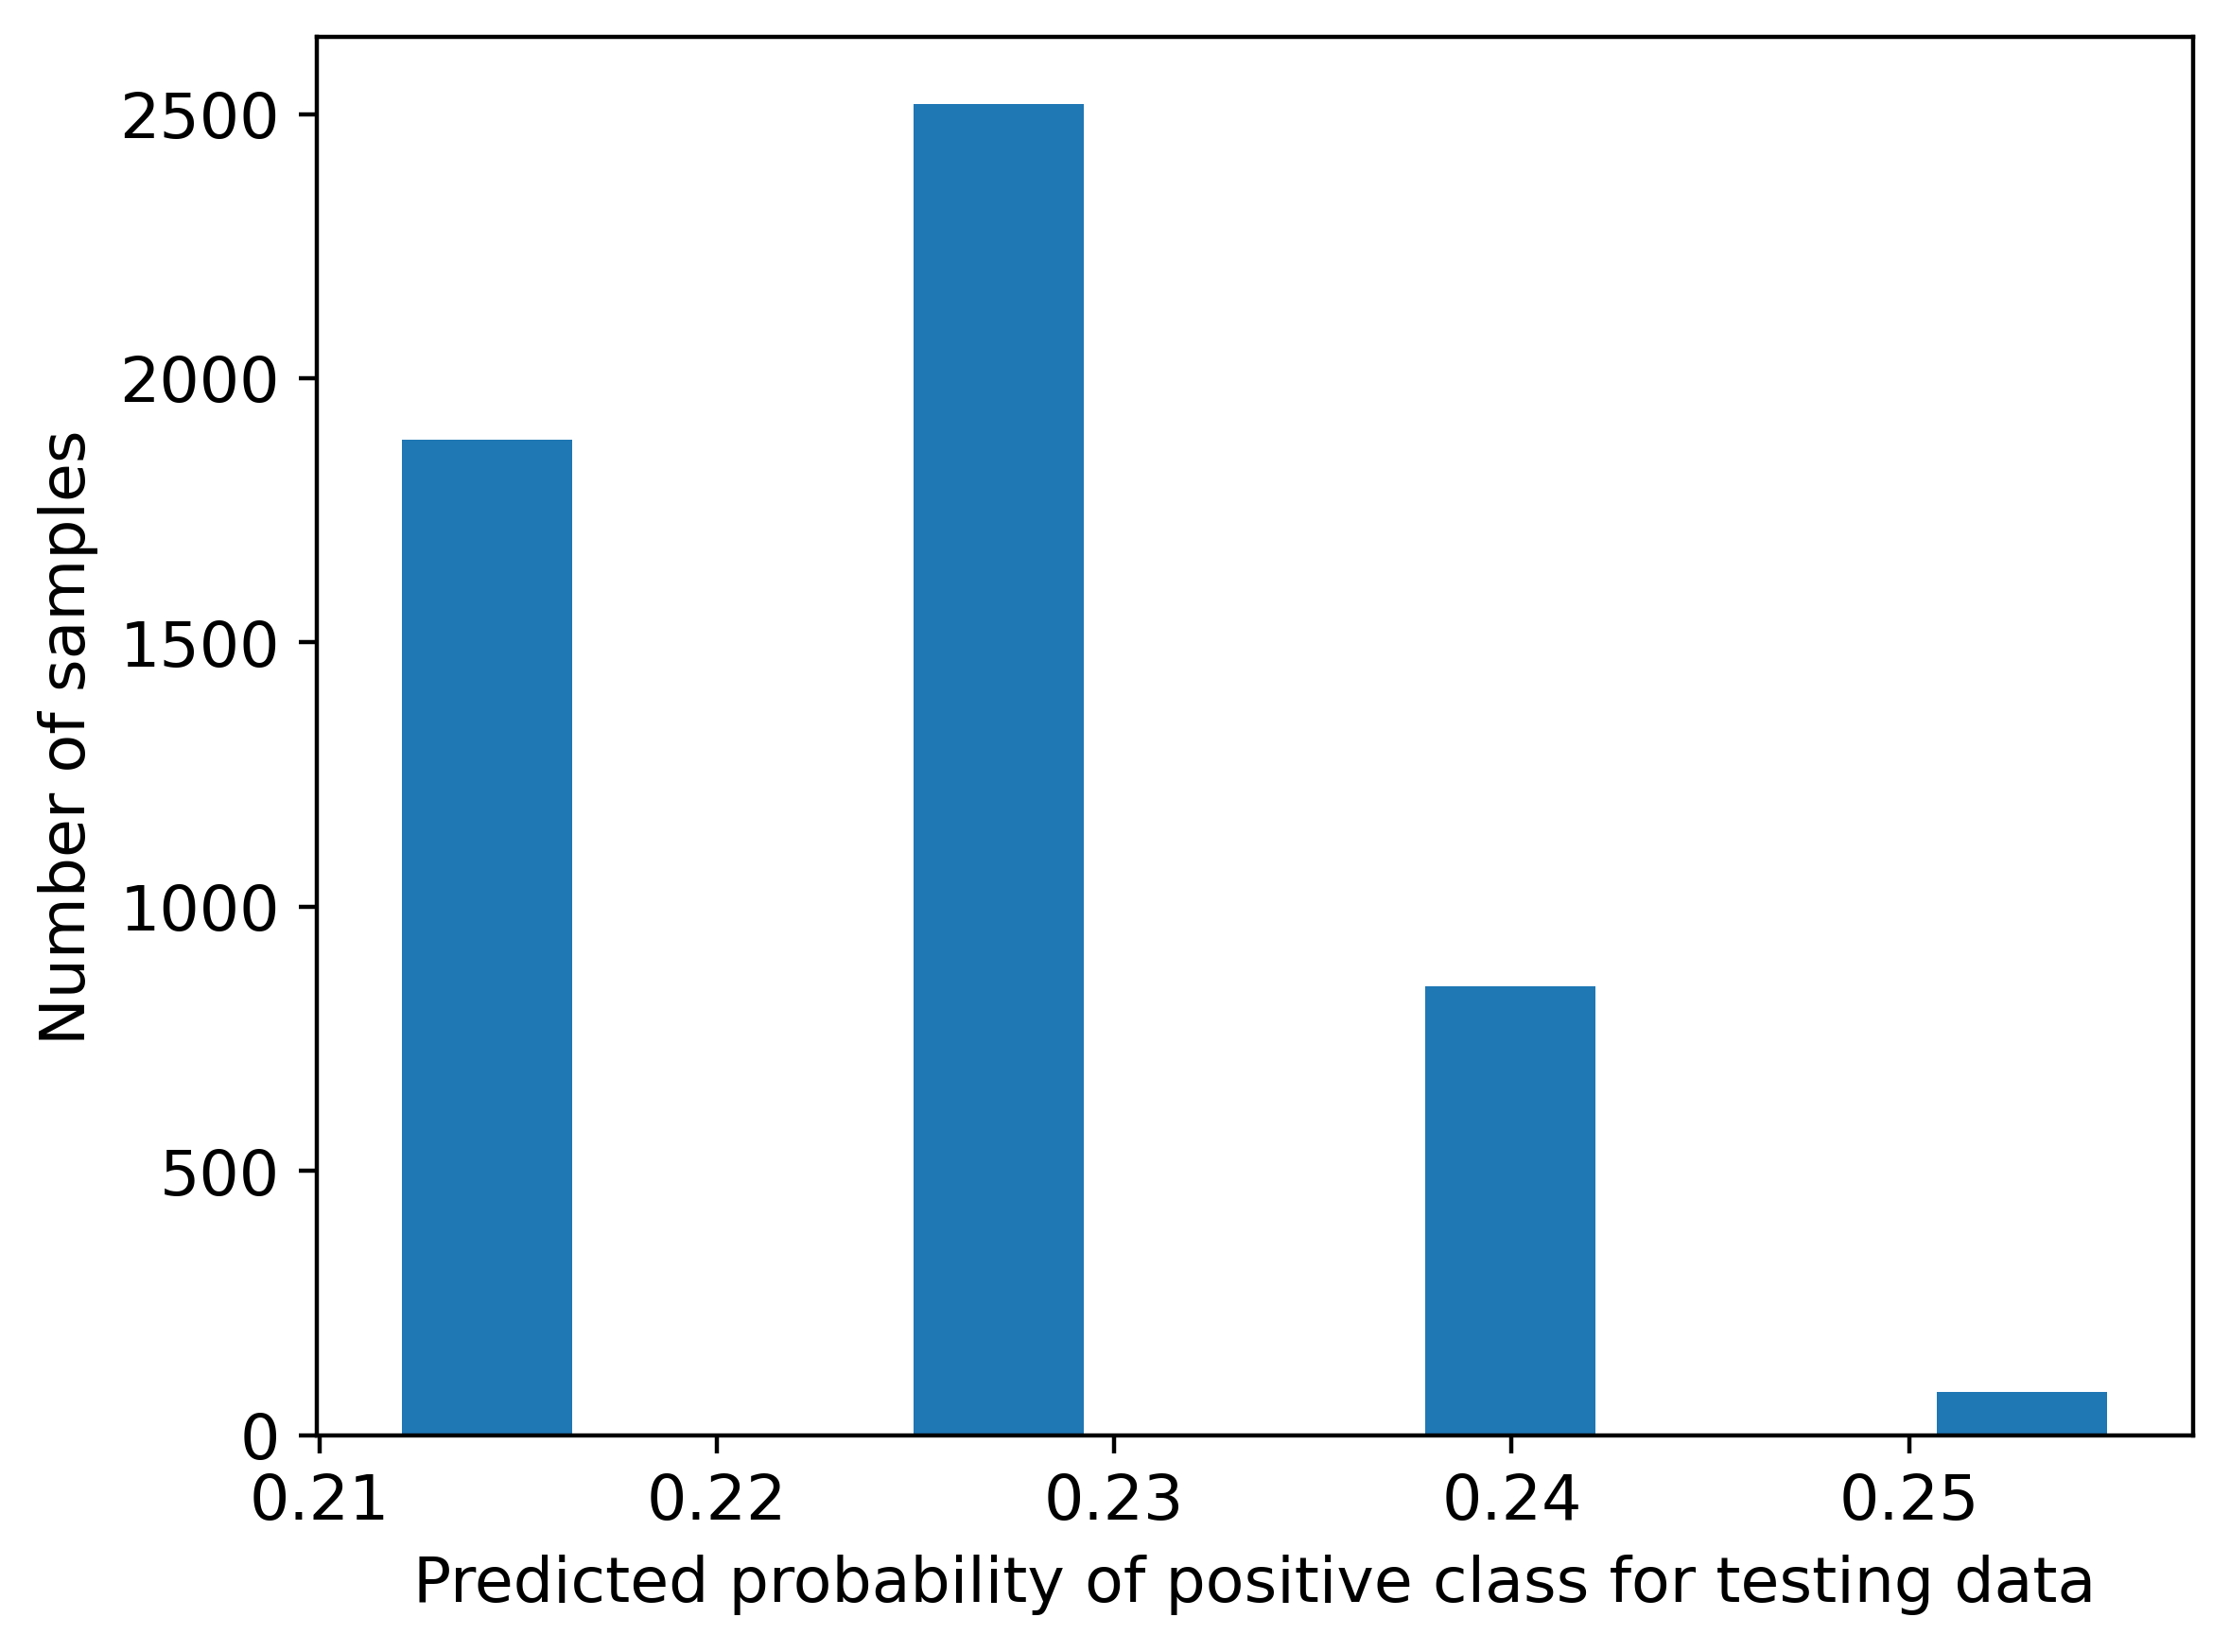

In [104]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [105]:
# Isolating the predicted probabilites for +ve and -ive sample

pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

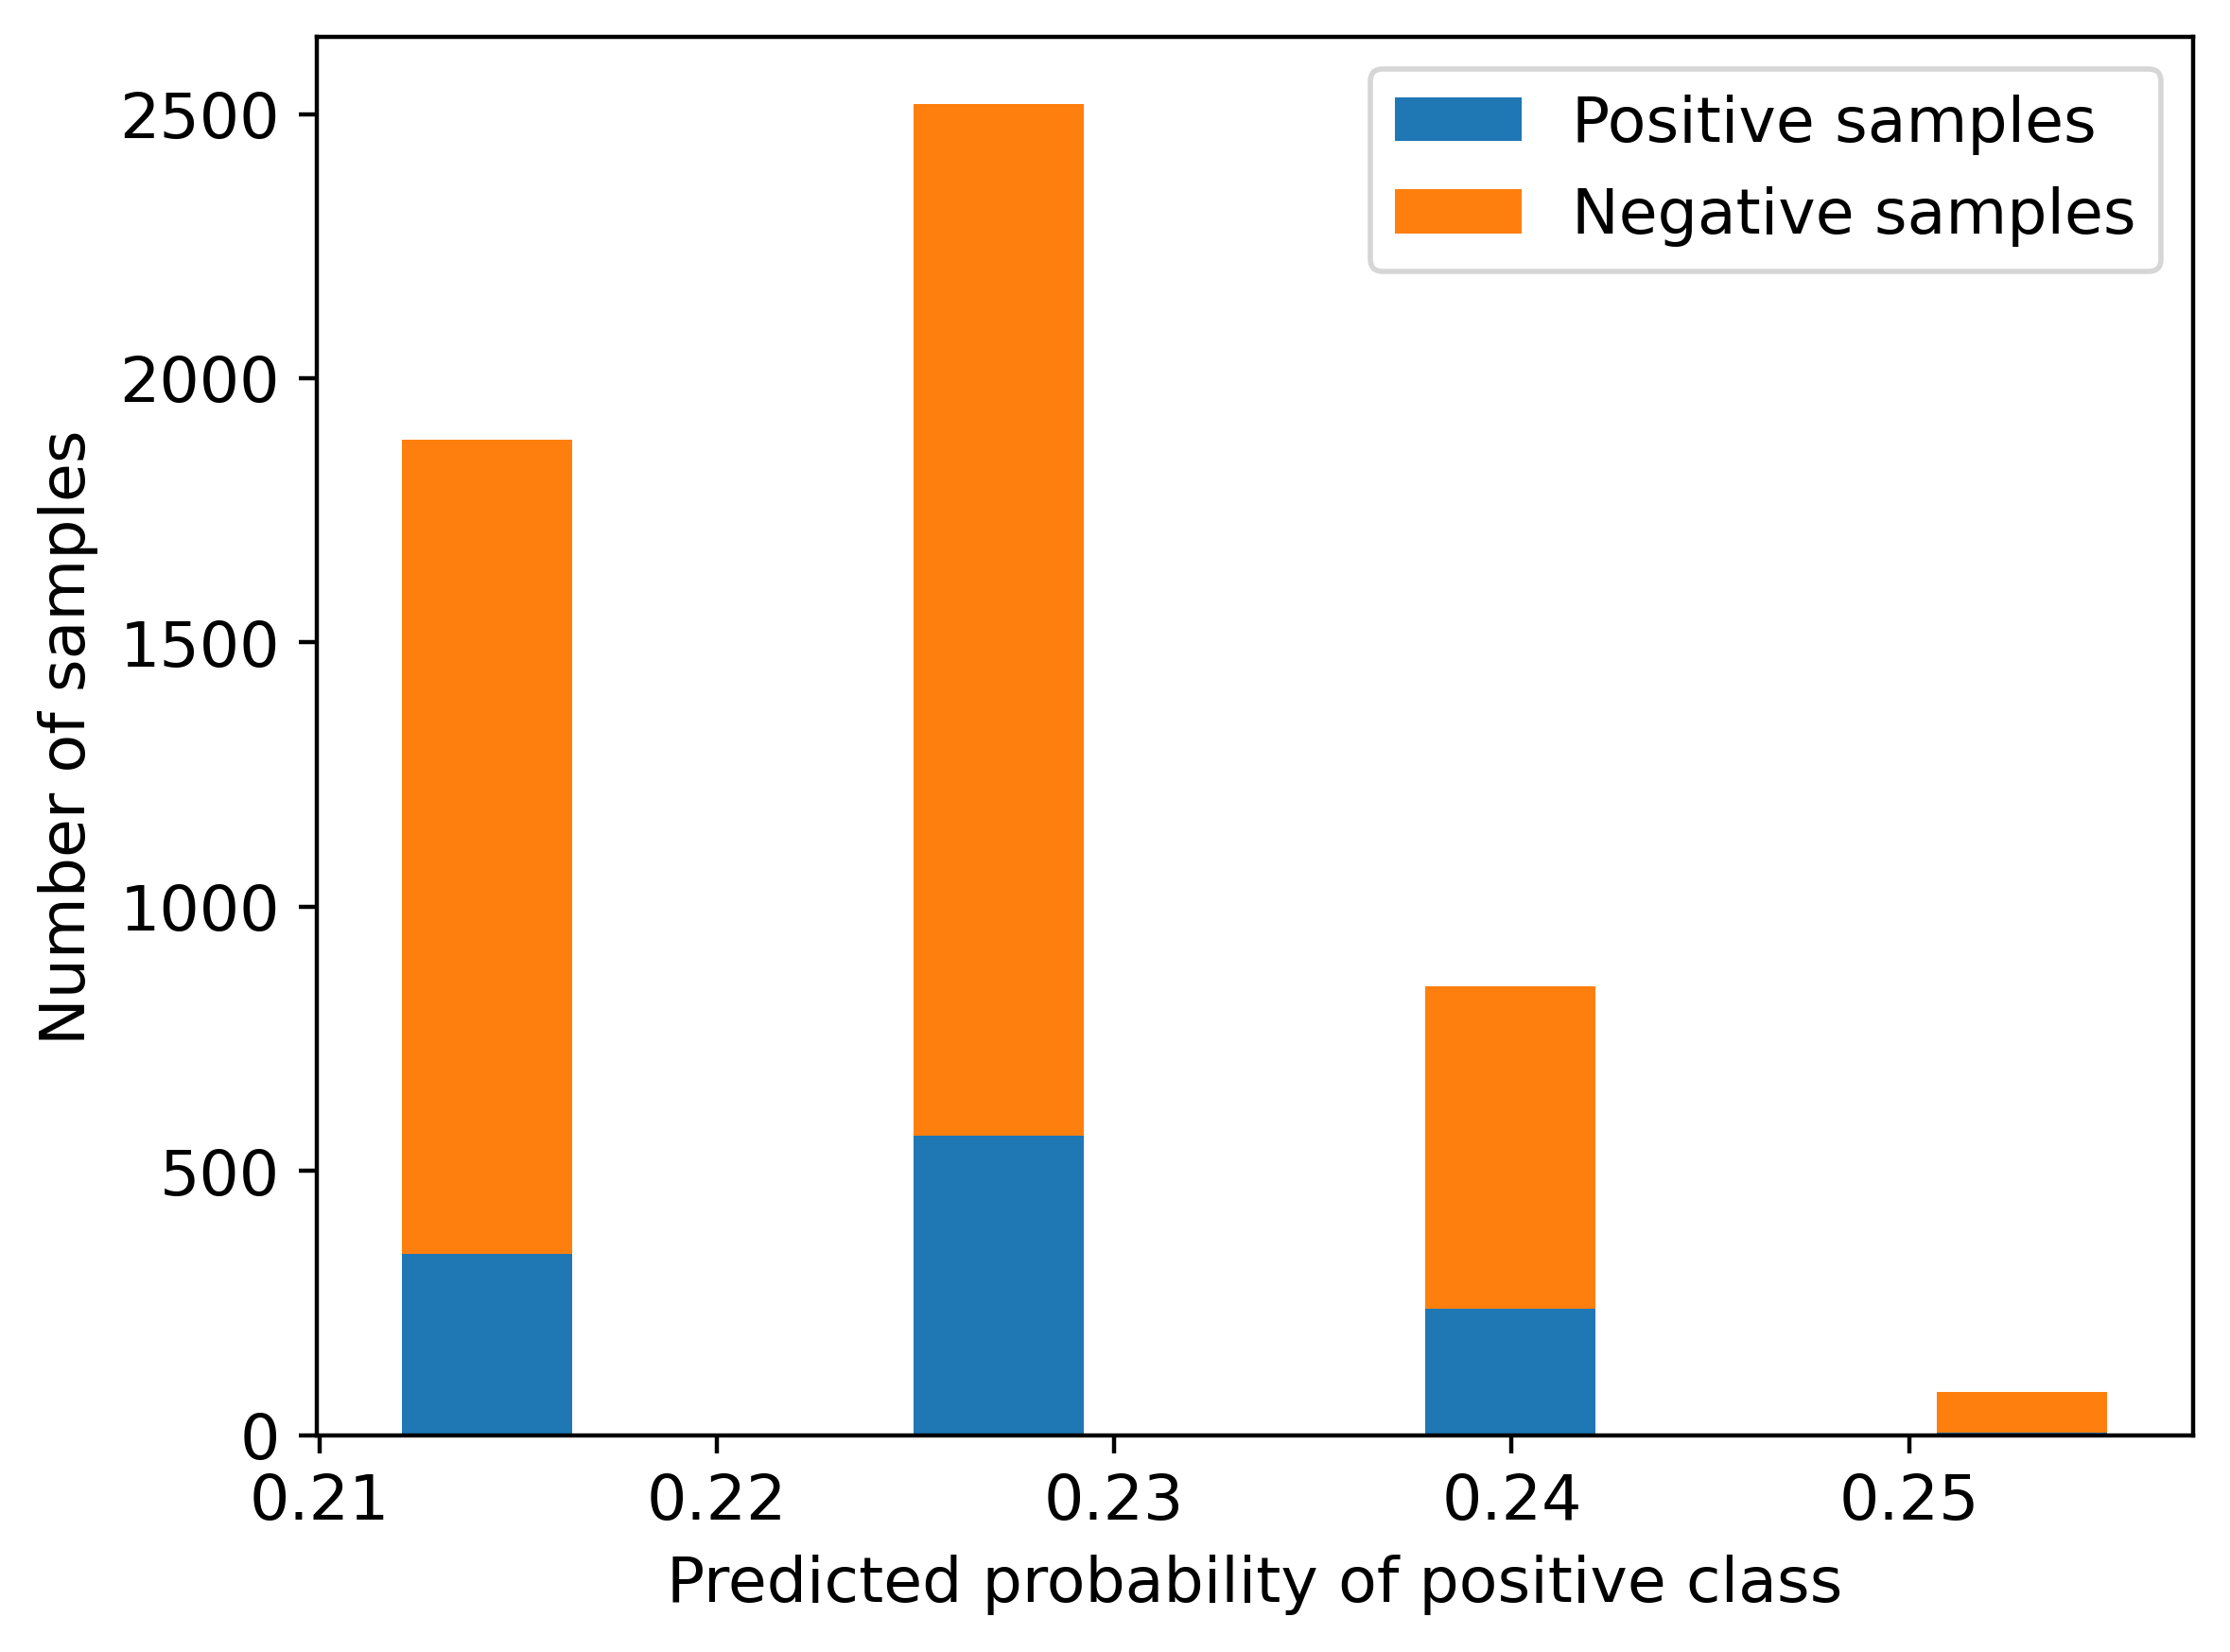

In [106]:
# Plotting a stacked histogram

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],
histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

In [107]:
# Receiver Operating Characteristic (ROC) curve
# a good classifier will be able to capture more true positives without
# expense of a large number of false postiive


fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

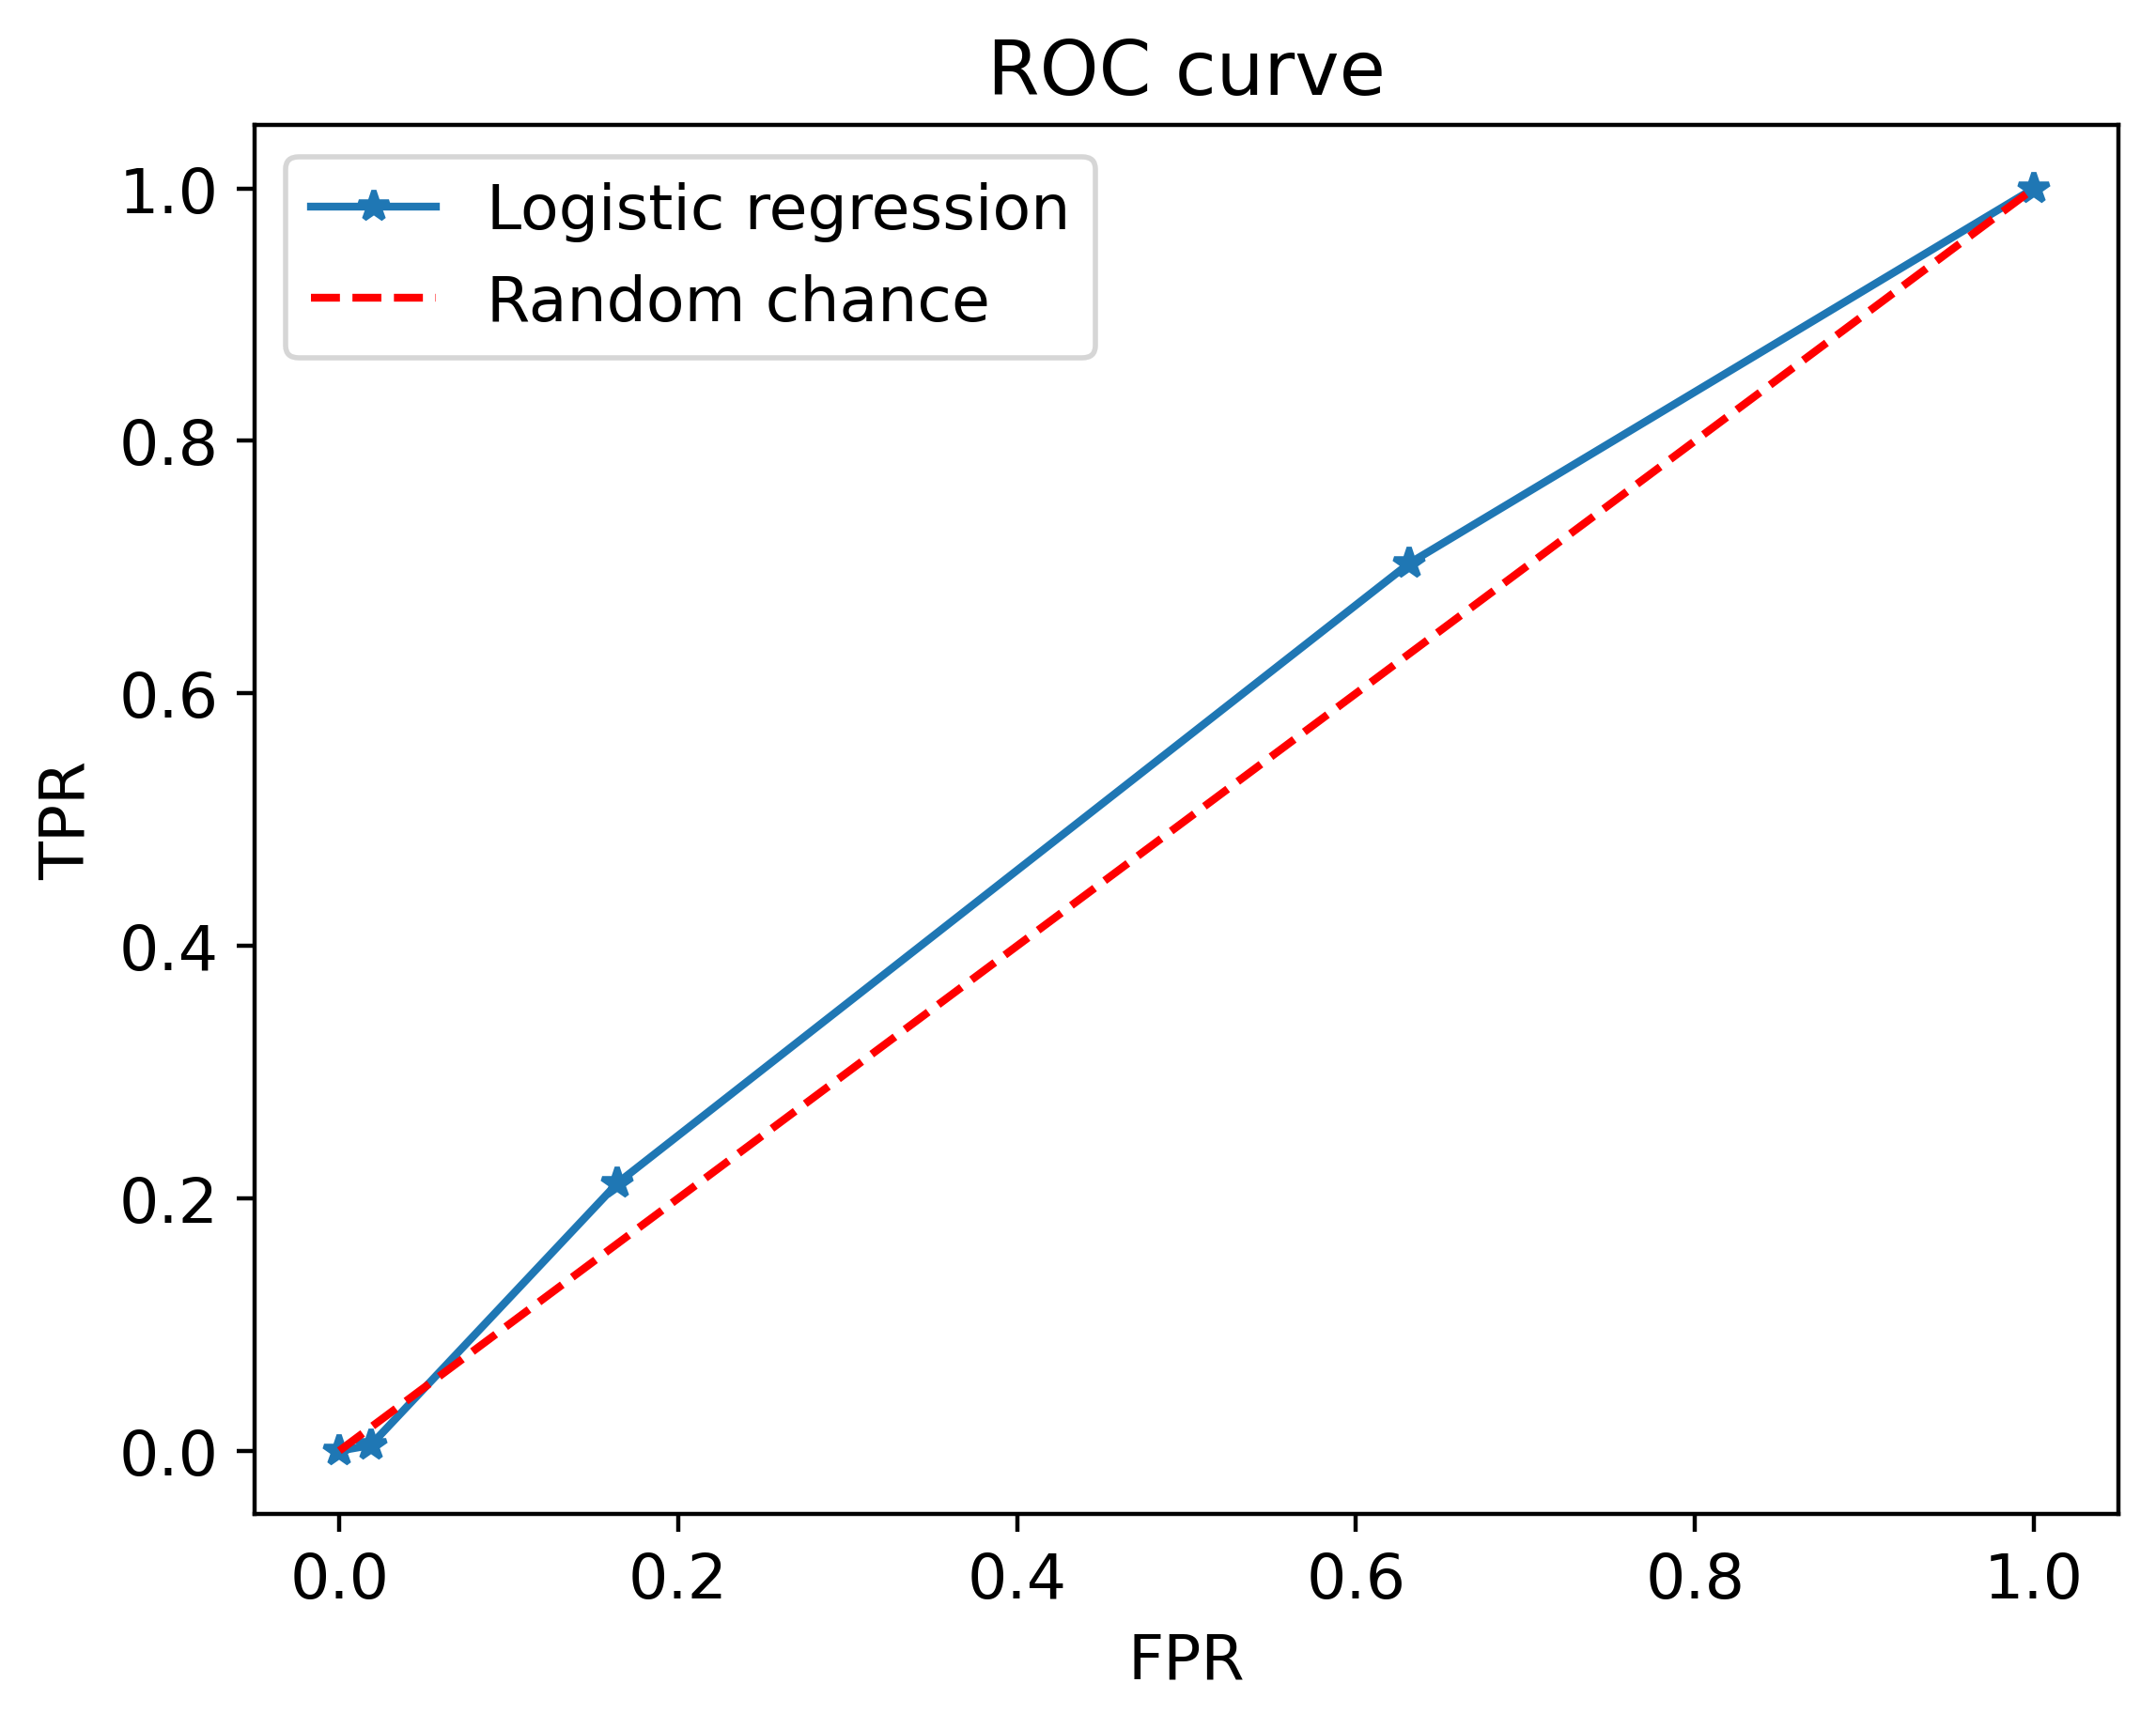

In [108]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [109]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [110]:
# C-statistics
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

0.5 indicates the model can do little better than random chance(coin flip)

 Precision - Positive Predictive Value